<a href="https://colab.research.google.com/github/SophieMargolis/Advanced_ML_DL_Course_Final_Project_LLM/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Final Project**<br>
#**Toxic & Harmful Text Classifier using Traditional NN, Mistral, and Llama LLMs**<br>
## By: Raz Graider, Dana Braynin, Sophie Margolis and Ran Asanta

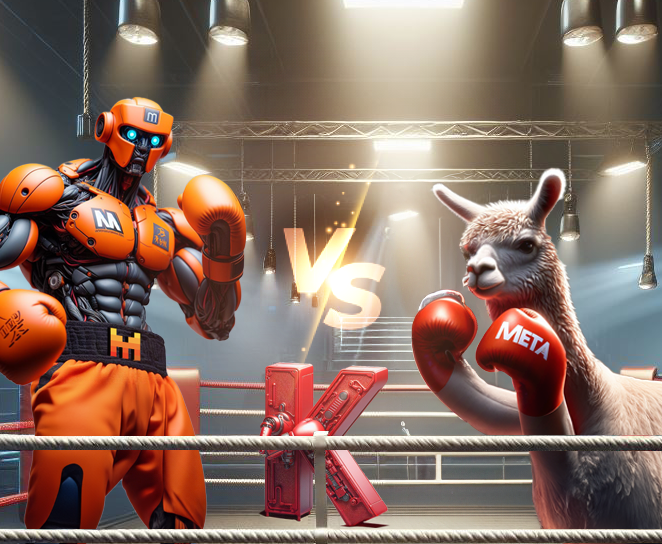

##**Introduction**

In recent years, the rapid expansion of social media platforms and online communities has not only facilitated greater connectivity and communication but has also revealed a darker side: hate speech and online harassment.<br>

In this project, we explored the challenge of detecting hate speech using machine learning, NLP techniques, and LLMs for sentiment analysis. Our focus was on comparing a **Keras** neural network model to two advanced Large Language Models (LLMs): **Mistral-7b** and **Llama-2-7b**. The objective was to classify text as offensive or non-offensive (a binary classification task), leveraging three distinct datasets.

#### **Keras NN vs. Mistral-7b vs. Llama-2-7b**
Our approach involved training a Keras neural network on the **entire dataset**, which comprised 140,218 rows of text collected from various sources, including Wikipedia forums. However, **the LLMs were fine-tuned using only 0.08% of the training data**, utilizing LoRa (Low-Rank Adaptation), a technique for optimizing model performance. Additionally, we explored the performance of the LLMs with prompt engineering.<br><br>
The results presented below offer insights into hate speech detection. Through our exploration, we gained a deeper understanding of the challenges, strengths, and limitations of each model or approach for this specific task. We invite you to join us on this journey!

##**Installing and import libraries**

###**Installing**

The code below installs essential Python libraries for natural language processing (NLP) tasks, including Hugging Face's 🤗 modules and libraries like datasets for data handling, accelerate for simplifying and accelerating the training and inference of LLMs, and several others.

In [ ]:
# For EDA
!pip install textstat
!pip install nltk

# For Data Preparation
!pip install datasets

# For Modeling & Evaluation
!pip install evaluate

# For Setup
!pip install -U sentence_transformers faiss-cpu bitsandbytes

# Connecting to the models
!pip install accelerate

# For Fine Tuning
!pip install peft

# For modeling
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

###**import libraries**

Following the installations, the code imports modules for data manipulation (pandas, numpy), NLP preprocessing (nltk, bs4), Keras NN and LLMs development (sklearn, keras, Hugging Face's 🤗 Transformers), and evaluation metrics (evaluate).

In [ ]:
# General
import warnings
warnings.filterwarnings('ignore')
import time
import os
import pandas as pd
import numpy as np
import re
import pickle
from google.colab import drive
drive.mount('/content/drive')

# EDA
import string
import textstat
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')

# Data Preparation
from datasets import load_dataset, Dataset, DatasetDict

# plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Keras
from nltk.tokenize.toktok import ToktokTokenizer
from tqdm.notebook import tqdm
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup

# Keras model
from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding, MaxPooling1D
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import pipeline
from sklearn.metrics import accuracy_score

# Prompt Engineering
import transformers
from transformers import AutoModelForCausalLM

# Fine Tuning
from peft import get_peft_model, LoraConfig, TaskType, prepare_model_for_kbit_training
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# Preproccesing - Tokanization
from transformers import AutoTokenizer, DataCollatorWithPadding

# Connecting to the models
from transformers import AutoModelForSequenceClassification, BitsAndBytesConfig
import accelerate

# Modeling & Evaluation
from transformers import TrainerCallback, Trainer, TrainingArguments
from copy import deepcopy
import evaluate
import torch

# Comparison
from IPython.display import IFrame

# Explainability
import pprint

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Data Preparation**

###**Loading the data**

Three datasets are loaded using the Hugging Face's 🤗 Dataset library:
1. stormfront_dataset: Contains data related to hate speech.
2. wiki_dataset: Consists of toxic comments from Wikipedia.
3. jigsaw_dataset: Includes multilingual toxicity data from Jigsaw.

In [ ]:
stormfront_dataset = load_dataset("hate_speech18")
wiki_dataset = load_dataset("OxAISH-AL-LLM/wiki_toxic")
jigsaw_dataset = load_dataset("textdetox/multilingual_toxicity_dataset", split="en")

### **Removing Duplicates**

First things first, we would like to handle duplications. Duplicates not only inflate the size of the dataset, potentially skewing the model's training process, but they can also lead to overfitting. This issue is particularly crucial in tasks like content moderation and sentiment analysis, where the model's ability to accurately classify text hinges on understanding underlying patterns. By ensuring the dataset is free of duplicates, the model can better learn the distinguishing features that differentiate offensive from non-offensive text.

In [ ]:
stormfront_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'user_id', 'subforum_id', 'num_contexts', 'label'],
        num_rows: 10944
    })
})

In [ ]:
wiki_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 127656
    })
    validation: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 31915
    })
    test: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 63978
    })
    balanced_train: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 25868
    })
})

In [ ]:
jigsaw_dataset

Dataset({
    features: ['text', 'toxic'],
    num_rows: 5000
})

In [ ]:
def check_and_drop_duplicates(data, data_name):
    '''
    input: data
    output: if there are duplicated rows:
               returns train_dropped_ds (the data after dropping duplicated rows)
    '''
    # Convert your dataset to a Pandas DataFrame
    train_df = data.to_pandas()

    # Check for duplicates
    duplicates_mask = train_df.duplicated()

    # Count the number of duplicates
    num_duplicates = duplicates_mask.sum()

    # Check if there are duplicated rows
    if num_duplicates > 0:
        print(f"{data_name} has {data.num_rows} rows, out of which {num_duplicates} rows are duplicated. "
              f"Now there are {data.num_rows - num_duplicates} rows remaining.")
        # Drop the duplicates
        train_dropped_df = train_df.drop_duplicates().reset_index(drop=True)
        train_dropped_ds = Dataset.from_pandas(train_dropped_df)
        return train_dropped_ds
    else:
        print(f"{data_name} has {data.num_rows} rows and none of them are duplicated.")
        return data

In [ ]:
stormfront_dataset['train'] = check_and_drop_duplicates(stormfront_dataset['train'], "Stormfront dataset")
stormfront_dataset

Stormfront dataset has 10944 rows, out of which 57 rows are duplicated. Now there are 10887 rows remaining.


DatasetDict({
    train: Dataset({
        features: ['text', 'user_id', 'subforum_id', 'num_contexts', 'label'],
        num_rows: 10887
    })
})

In [ ]:
wiki_dataset['train'] = check_and_drop_duplicates(wiki_dataset['train'], "Wiki dataset")
wiki_dataset

Wiki dataset has 127656 rows and none of them are duplicated.


DatasetDict({
    train: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 127656
    })
    validation: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 31915
    })
    test: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 63978
    })
    balanced_train: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 25868
    })
})

In [ ]:
jigsaw_dataset = check_and_drop_duplicates(jigsaw_dataset, "Jigsaw dataset")
jigsaw_dataset

Jigsaw dataset has 5000 rows, out of which 100 rows are duplicated. Now there are 4900 rows remaining.


Dataset({
    features: ['text', 'toxic'],
    num_rows: 4900
})

###**Train-Validation-Test Split**

Each dataset is split into train, validation, and test sets. This approach helps prevent the model from memorizing the training data and ensures that it can effectively classify new, unseen text.

#### stormfront

Before splitting Stormfront dataset, we would like to have a general view of its observations - label distribution, glimpse into selected data and shapes.

In [ ]:
stormfront_df = pd.DataFrame(stormfront_dataset['train'])

In this specific dataset, we have 4 labels. According to the documentation, the relevant labels are 0 and 1 (not offensive and offensive).

In [ ]:
stormfront_df['label'].value_counts()

label
0    9465
1    1193
3     168
2      61
Name: count, dtype: int64

Let's leave only labels 0 and 1:

In [ ]:
# Removing labels that are not offensive or not offensive (0, 1)
stormfront_df = stormfront_df[~stormfront_df['label'].isin([2,3])]
stormfront_df['label'].value_counts()

label
0    9465
1    1193
Name: count, dtype: int64

We'll create `x` and `y`:

In [ ]:
# Creating variables to use in the train test split
x_stormfront_df=stormfront_df['text']
y_stormfront_df=stormfront_df['label']

Let's check that our `y` has the same label count as the data itself:

In [ ]:
y_stormfront_df.value_counts()

label
0    9465
1    1193
Name: count, dtype: int64

We decided to split the data into 80% train.

In [ ]:
# Split the data to train and test
x_stormfront_train, x_stormfront_test, y_stormfront_train, y_stormfront_test = train_test_split(x_stormfront_df, y_stormfront_df, test_size=0.2, random_state=42)

In [ ]:
x_stormfront_train.shape

(8526,)

In [ ]:
y_stormfront_train.shape

(8526,)

10% out of all the data will be used as validation and 10% will be used at test:

In [ ]:
# Split the test data to test and validation
x_stormfront_val, x_stormfront_test, y_stormfront_val, y_stormfront_test = train_test_split(x_stormfront_test, y_stormfront_test, test_size=0.5, random_state=42)

#### wiki

We would like to have a general view of Wiki's observations - label distribution, glimpse into selected data and shapes. In this specific dataset, the data is already split.



In [ ]:
wiki_df_train = pd.DataFrame(wiki_dataset['train'])
wiki_df_val = pd.DataFrame(wiki_dataset['validation'])
wiki_df_test = pd.DataFrame(wiki_dataset['test'])

In [ ]:
wiki_df_train['label'].value_counts()

label
0    114722
1     12934
Name: count, dtype: int64

In [ ]:
# Create variables of X and Y in each data

x_wiki_train = wiki_df_train['comment_text']
y_wiki_train = wiki_df_train['label']

x_wiki_val = wiki_df_val['comment_text']
y_wiki_val = wiki_df_val['label']

x_wiki_test = wiki_df_test['comment_text']
y_wiki_test = wiki_df_test['label']

#### jigsaw

Before splitting Jigsaw dataset, we would like to have a general view of its observations - label distribution, glimpse into selected data and shapes.

In [ ]:
jigsaw_df = pd.DataFrame(jigsaw_dataset)

In [ ]:
jigsaw_df['toxic'].value_counts()

toxic
0    2500
1    2400
Name: count, dtype: int64

In [ ]:
# Creating variables to use in the train test split
x_jigsaw_df=jigsaw_df['text']
y_jigsaw_df=jigsaw_df['toxic']

The same as in stormfront data, we'll use 80% as train, 10% as validation and 10% as test.

In [ ]:
# Split the data to train and test
x_jigsaw_train, x_jigsaw_test, y_jigsaw_train, y_jigsaw_test = train_test_split(x_jigsaw_df, y_jigsaw_df, test_size=0.2, random_state=42)

# Split the test data to test and validation
x_jigsaw_val, x_jigsaw_test, y_jigsaw_val, y_jigsaw_test = train_test_split(x_jigsaw_test, y_jigsaw_test, test_size=0.5, random_state=42)

In [ ]:
x_jigsaw_train.shape

(3920,)

In [ ]:
x_jigsaw_val.shape

(490,)

In [ ]:
x_jigsaw_test.shape

(490,)

### **Combining Train and Validation**

In this section, we will attach a matching label to each sentence in the train and validation sets from stormfront, wiki, and jigsaw datasets.<br>
We want the models to use a train and validation data that will consist of all 3 datasets. We'll combine the `x` and `y` into one dataset and than combine them into one train and one validation.

In [ ]:
# Combine the x and y in train and val in each data set
combined_stormfront_train = pd.DataFrame({'text':x_stormfront_train, 'label':y_stormfront_train})
combined_wiki_train = pd.DataFrame({'text':x_wiki_train, 'label':y_wiki_train})
combined_jigsaw_train = pd.DataFrame({'text':x_jigsaw_train, 'label':y_jigsaw_train})

combined_stormfront_val = pd.DataFrame({'text':x_stormfront_val, 'label':y_stormfront_val})
combined_wiki_val = pd.DataFrame({'text':x_wiki_val, 'label':y_wiki_val})
combined_jigsaw_val = pd.DataFrame({'text':x_jigsaw_val, 'label':y_jigsaw_val})

Let's take a look at the combined stormfront train data:

In [ ]:
combined_stormfront_train

,text,label
7779,I wonder if this guy still thinks the Jews are...,1
3088,With the liberal media and police departments ...,1
4120,I run three miles a day during the week and da...,0
2524,http://www.righttomarch.com/,0
6842,Står i butik ( papirforretn. ) ( The above are...,0
...,...,...
5834,and jewish. he 's a member of the jewish commu...,0
5284,2 packs a day @ $ 10 is $ 300 a month and over...,0
5487,I THANK ALL OF YOU VERY MUCH,0
867,And you will have to teach alot of lies to the...,0


In this section, we will concatenate train and validation sets from stormfront, wiki, and jigsaw datasets. This would be useful when we will get to the neural network part and LLMs.

In [ ]:
# Combine 3 data sets to one (for train and val)
combined_train = pd.concat([combined_stormfront_train, combined_wiki_train, combined_jigsaw_train]).sample(frac=1).reset_index(drop=True)
combined_val = pd.concat([combined_stormfront_val, combined_wiki_val, combined_jigsaw_val]).sample(frac=1).reset_index(drop=True)

Let's take a look at the combined train:

In [ ]:
combined_train

,text,label
0,"Ironically, at this point the demoralised and ...",0
1,"UFC 191 \n\nTHIS IS THE FINALIZED BOUT ORDER, ...",1
2,Authority Figures strikes me as a better name ...,0
3,", perhaps a read of WP:SYNTHESIS might aid an ...",0
4,""":: //jainismus.hubpages.com/hub/The-Khatri-C...",0
...,...,...
140097,Such a battery system has already been develop...,0
140098,"Well, hell, it sounds like pistols at sunup th...",0
140099,Maybe before 1789 .,0
140100,A discussion on Windows Phone 7 \nYou are here...,0


We'll split the train and validation into `x` and `y` to use while modeling and preproccesing.

In [ ]:
# Create variables to hold the combined X and Y in the train and val

x_combined_train = combined_train['text']
y_combined_train = combined_train['label']

x_combined_val = combined_val['text']
y_combined_val = combined_val['label']

In [ ]:
x_combined_train.shape

(140102,)

In [ ]:
y_combined_train.shape

(140102,)

### **Trasforming the DataFrames to HuggingFace's Format**

Now, we would like to transform our combined datasets, from Dataframe to Dataset format. Hugging Face's 🤗 Datasets provide a standardized way to organize and preprocess text data.

In [ ]:
# Create an empty dict
data_dict = {}
# Set the 'train' key as the combined train data
data_dict['train'] = Dataset.from_pandas(combined_train)
# Set the 'val' key as the combined val data
data_dict['val'] = Dataset.from_pandas(combined_val)

In [ ]:
# Trasnforming "stormfront" test to Dataset
combined_stormfront_test = pd.DataFrame({'text': x_stormfront_test, 'label': y_stormfront_test})
# Drop the index
combined_stormfront_test = combined_stormfront_test.reset_index(drop=True)
# Transform to Dataset
data_dict['stormfront_test'] = Dataset.from_pandas(combined_stormfront_test)

# Trasnforming "wiki" test to Dataset
combined_wiki_test = pd.DataFrame({'text': x_wiki_test, 'label': y_wiki_test})
# Drop the index
combined_wiki_test = combined_wiki_test.reset_index(drop=True)
# Transform to Dataset
data_dict['wiki_test'] = Dataset.from_pandas(combined_wiki_test)

# Trasnforming "jigsaw" test to Dataset
combined_jigsaw_test = pd.DataFrame({'text': x_jigsaw_test, 'label': y_jigsaw_test})
# Drop the index
combined_jigsaw_test = combined_jigsaw_test.reset_index(drop=True)
# Transform to Dataset
data_dict['jigsaw_test'] = Dataset.from_pandas(combined_jigsaw_test)

data_dict

{'train': Dataset({
     features: ['text', 'label'],
     num_rows: 140102
 }),
 'val': Dataset({
     features: ['text', 'label'],
     num_rows: 33471
 }),
 'stormfront_test': Dataset({
     features: ['text', 'label'],
     num_rows: 1066
 }),
 'wiki_test': Dataset({
     features: ['text', 'label'],
     num_rows: 63978
 }),
 'jigsaw_test': Dataset({
     features: ['text', 'label'],
     num_rows: 490
 })}

In [ ]:
# Transform the dict created to DataSetDict
llm_dataset = DatasetDict(data_dict)
llm_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 140102
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 33471
    })
    stormfront_test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    wiki_test: Dataset({
        features: ['text', 'label'],
        num_rows: 63978
    })
    jigsaw_test: Dataset({
        features: ['text', 'label'],
        num_rows: 490
    })
})

After transforming our datasets into the optimal structure, we decided to use only 0.08% of the training data.<br>
Initially, we attempted to use the entire training set, but we quickly realized that the training process would have taken **210 hours** (!). Recognizing this as infeasible, we looked for a solution to address this issue effectively.<br>
Unfortunately, any percentage higher than 0.08% caused crashes due to memory limitations. Therefore, we determined that the only possible amount of training data for us was 0.08%. This reduction helps in creating a more manageable, less time-consuming dataset for the models, especially when dealing with large datasets.<br><br>
This decision led us to explore the project from a different perspective. Given the large size and special capabilities of LLMs, we questioned whether training them on just 0.08% of the training data would yield results comparable to those of a simple Keras NN trained on the entire dataset? We'll found out soon.

In [ ]:
# Take only 0.08% of the train data
llm_dataset["train"] = llm_dataset["train"].select(range(0, int(len(llm_dataset["train"]) * 0.008)))
# Take only 0.08% of the val data
llm_dataset["val"] = llm_dataset["val"].select(range(0, int(len(llm_dataset["val"]) * 0.008)))
# Take only 500 of the Wiki test data
llm_dataset["wiki_test"] = llm_dataset["wiki_test"].select(range(0, 500))
llm_dataset

llm_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1120
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 267
    })
    stormfront_test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    wiki_test: Dataset({
        features: ['text', 'label'],
        num_rows: 500
    })
    jigsaw_test: Dataset({
        features: ['text', 'label'],
        num_rows: 490
    })
})

##**Exploratory Data Analysis**

###Glimpse to the data


Let's have a look at our train data:


In [ ]:
combined_train.head(10)

,text,label
0,"register bank switching \n\nMany months ago, y...",0
1,Are there are a bunch of H-53 squadrons in Haw...,0
2,"""\n\n """"read the notice"""" \n\nAs you seem to b...",0
3,"""\n\nAndromedean - You say, rightly, """"there a...",0
4,"""::Help me understand. We both agree it is sui...",0
5,I've made a request according to the instructi...,0
6,I have green eyes which come from my Celtic an...,0
7,This IP maps back to:\n person: DTAG Glo...,0
8,"""\n\nThe sentence was added back by with no ...",0
9,oldprodfull\n| nom = Passportguy\n| nomd...,0


We can see at this point some text with '/n' or HTML leftovers we will need to address later.

In [ ]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140102 entries, 0 to 140101
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    140102 non-null  object
 1   label   140102 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


We do not have any null values. This is evident from the fact that there are 140,102 entries, and in each column, there are also 140,102 non-null entries. Additionally, we observe that the `text` column is of type object. The `label` column, as assumed, contains integers.

In [ ]:
print(combined_train.shape)

(140102, 2)


###Label count


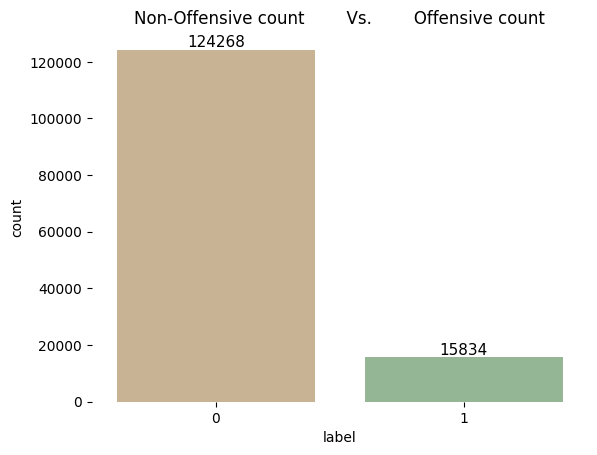

In [ ]:
# Create the countplot
ax = sns.countplot(x="label", data=combined_train, palette=["tan", "darkseagreen"])

#remove the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add counts above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Non-Offensive count        Vs.        Offensive count', fontsize=12)
plt.show()

The dataset is highly unbalanced: 124,128 rows are labeled as non-offensive, while only 15,834 are categorized as offensive comments. Later, we will address this issue. One strategy we've considered is class weighting, which involves assigning greater importance to the minority class (offensive comments) during model training to ensure accurate classification of both types.

###Most common words


In [ ]:
# Ensure stopwords are downloaded
nltk.download('stopwords')

def plot_most_frequent_words(df, top_n=10, offensive=True, stop_words=True):
    """
    input: DataFrame
            top_n: number of words to display in the plot
            offensive: if True, plot words for rows where 'label' == 1; otherwise, plot words for all rows
            stop_words: if True, exclude English stopwords from the word frequency calculation; otherwise, include them
    output: plot
    """
    # Get the list of English stopwords from the NLTK corpus
    stopword_list = nltk.corpus.stopwords.words('english')

    # If offensive is True, filter the DataFrame for rows where 'label' == 1
    if offensive:
        filtered_texts = df[df['label'] == 1]['text']
    else:
        # If offensive is False, use all texts in the DataFrame
        filtered_texts = df['text']

    # Combine sentences from the filtered texts into one string
    combined_text = ' '.join(filtered_texts)

    # Tokenize words and filter out punctuation
    all_words = combined_text.lower().split()

    # Filter out stopwords if stop_words is True
    if stop_words:
        all_words = [word for word in all_words if word.isalnum() and word not in stopword_list]

    # Calculate word frequency
    word_freq = Counter(all_words)

    # Convert to DataFrame
    word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])
    word_freq_df.index.name = 'Word'
    word_freq_df.reset_index(inplace=True)

    # Sort DataFrame by frequency
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(top_n), color= 'lightslategray')
    plt.title(f'Top {top_n} Most Common Words Excluding Stopwords' if stop_words else f'Top {top_n} Most Common Words Including Stopwords')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


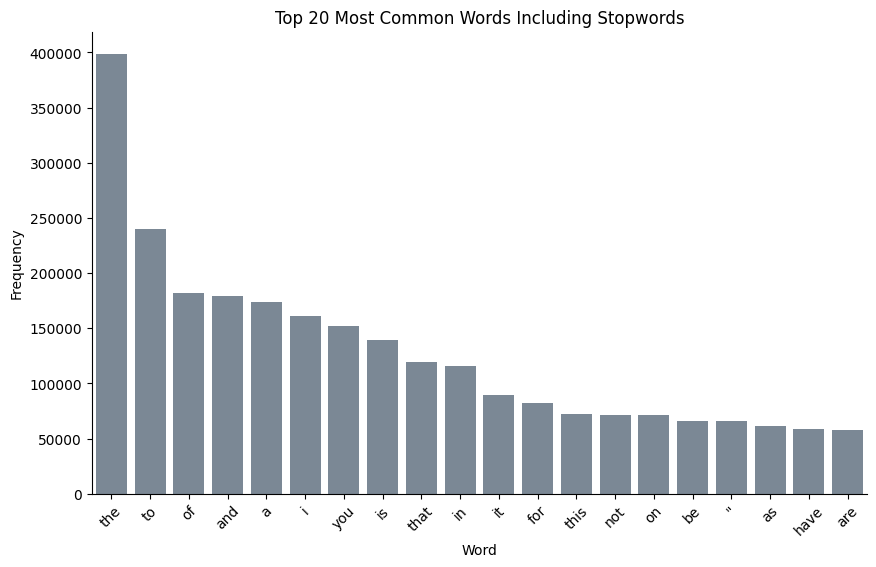

In [ ]:
plot_most_frequent_words(combined_train, 20, False, False)  # Plot for all comments with stopwords

As assumed, the list of the 20 most common words in the dataset consists of many stop words.<br>
Let's take a closer look at what the actual 20 most common words are.

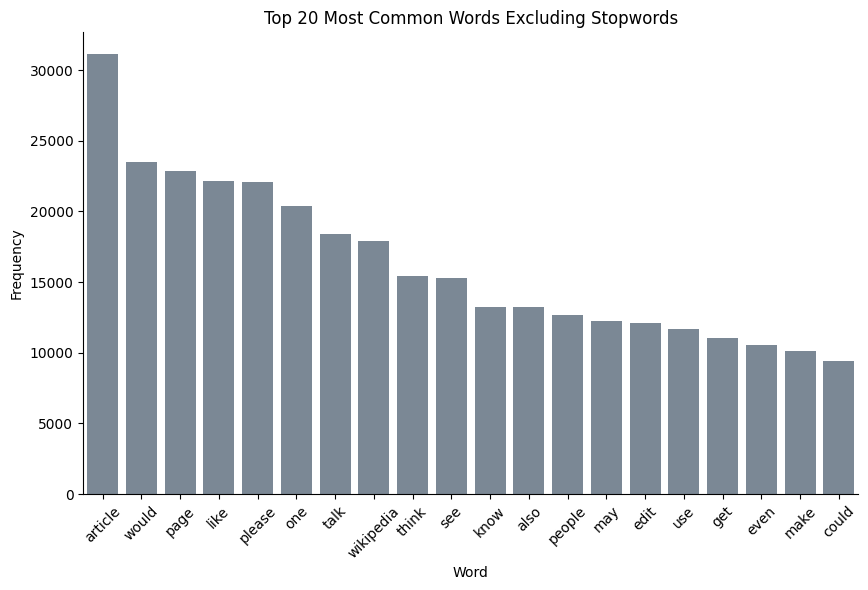

In [ ]:
plot_most_frequent_words(combined_train, 20, False, True)  # Plot for all comments without stopwords

After excluding the stop words, we can clearly identify the common words present in the dataset.<br>
This list comprises typical daily English words.

* It's noticeable that none of these words are offensive, which aligns with the fact that our data has much more non-offensive comments than offensive.
* Additionally, it's unsurprising to find the word 'Wikipedia' in this list, considering that the dataset sourced from Wikipedia forums was the largest among the others.

Now, let's take a closer look at the **offensive comments**.<br>
Since the most common words in the offensive comments were also stop words, we decided to plot them only when excluding them.<br>
Perhaps we can guess what the most common words in these are, but still, we wanted to check it out.

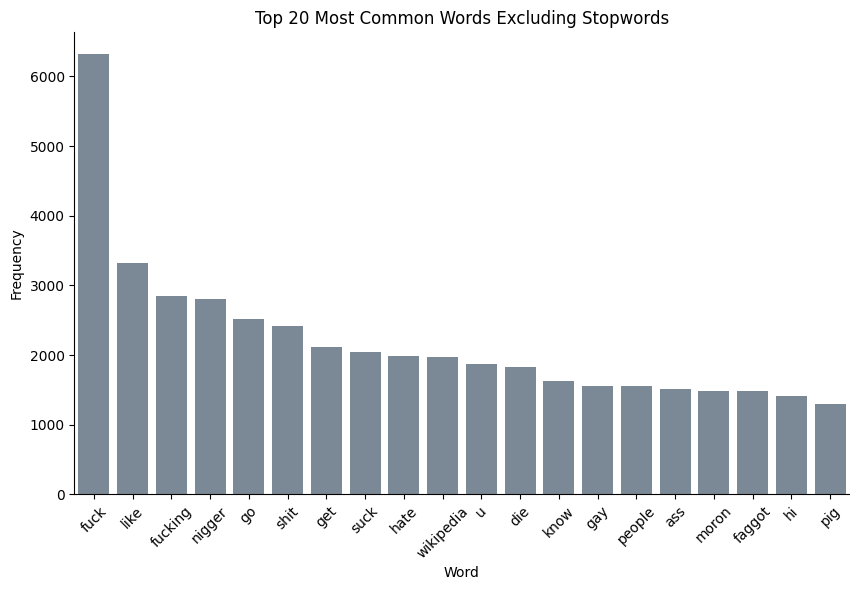

In [ ]:
plot_most_frequent_words(combined_train, 20, True, True)  # Plot for offensive comments (label == 1) without stopwords

Based on the offensive comments analyzed, we can conclude that:

* The word 'nigger' ranks as the 4th most common, indicating its widespread usage as a racial insult.
* Words like 'gay' and 'faggot' indicate targeted attacks on sexual orientation.
* Other words such as 'moron', 'pig', 'fuck', 'hate', and 'die' obviously convey an aggressive and offensive sentiment.
* We can only guess why the word 'go' is so popular in offensive comments; our thought is because it's usually used to "send someone somewhere" as an insult, for example, 'go die' or anything similar. We're a bit concerned about correctly classifying comments with this word since this word is not aggressive or offensive itself, hopefully the models will recognize the context provided by the following word.

###Text length anlysis

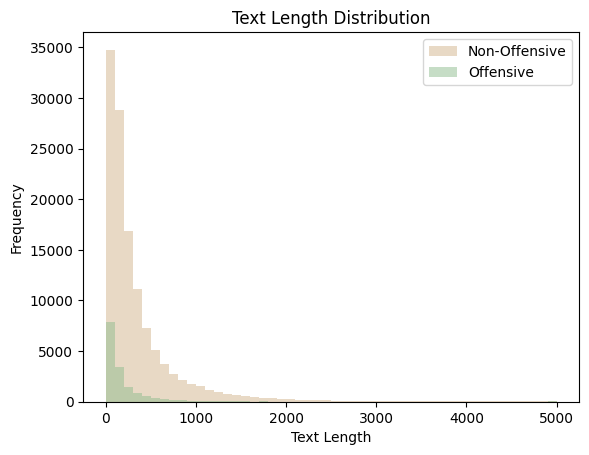

In [ ]:
# Calculate text lengths for offensive samples
offensive_lengths = combined_train[combined_train['label'] == 1]['text'].apply(len)

# Calculate text lengths for non-offensive samples
non_offensive_lengths = combined_train[combined_train['label'] == 0]['text'].apply(len)

# Plot the distributions
plt.hist(non_offensive_lengths, bins=50, alpha=0.5, color='tan', label='Non-Offensive')
plt.hist(offensive_lengths, bins=50, alpha=0.5, color='darkseagreen', label='Offensive')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.legend()
plt.show()

In [ ]:
# Calculate statistics
offensive_stats = (offensive_lengths.min(), offensive_lengths.mean(), offensive_lengths.max())
non_offensive_stats = (non_offensive_lengths.min(), non_offensive_lengths.mean(), non_offensive_lengths.max())
print('Offensive statistics length:', offensive_stats)
print('Non-Offensive statistics length:', non_offensive_stats)

Offensive statistics length: (8, 263.2351269420235, 5000)
Non-Offensive statistics length: (1, 379.176223967554, 5000)


The numbers above represent the minimum, average, and maximum comment lengths for each class.

* The identical maximum value across classes might suggest a limitation on comment lengths, possibly due to all datasets being sourced from the Hugging Face's 🤗 Datasets library.
* Offensive comments have a minimum length of 8 words, which makes sense given the complexity often associated with expressing offensive language or sentiments.
* We can also observe that the average length of offensive comments is smaller than non-offensive ones, possibly because offensive language tends to be more direct.

###N-grams

In [ ]:
def get_top_ngrams(corpus, n, num_of_ngrams):
    '''
    input: corpus (the Data Frame with only the 'text' column),
           n (number of words in an expression)
           num_of_ngrams (number of top n expressions to represent)
    output: words_freq[:num_of_ngrams] (top num_of_ngrams ngrams)
    '''
    # Fit CountVectorizer to the corpus with specified ngram range
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)

    # Transform the corpus into a bag of words representation
    bag_of_words = vec.transform(corpus)

    # Sum the word occurrences across the corpus
    sum_words = bag_of_words.sum(axis=0)

    # Create a list of tuples containing the ngram and its frequency
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort the list of tuples by frequency in descending order
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:num_of_ngrams]

In [ ]:
def plot_top_ngrams(corpus, n, num_of_ngrams):
    '''
    input: corpus (the DataFrame with only the 'text' column),
           n (number of words in an expression)
           num_of_ngrams (number of top n expressions to represent)
    output: plot
    '''
    # Create a figure for the plot
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Get the top ngrams using the get_top_ngrams function
    top_ngrams = get_top_ngrams(corpus, n, num_of_ngrams)

    # Unzip the top_ngrams tuple into separate lists for x and y values
    x, y = zip(*top_ngrams)

    # Create a horizontal bar plot
    ax = sns.barplot(x=y, y=x, color='lightslategray')  # Switch x and y for horizontal barplot

    # Set label for x-axis, for y-axis and for the title
    plt.xlabel('Frequency')
    plt.ylabel('Ngram')
    plt.title(f'Top {num_of_ngrams} {n}-grams')

    # Add count labels to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center')

    plt.show()


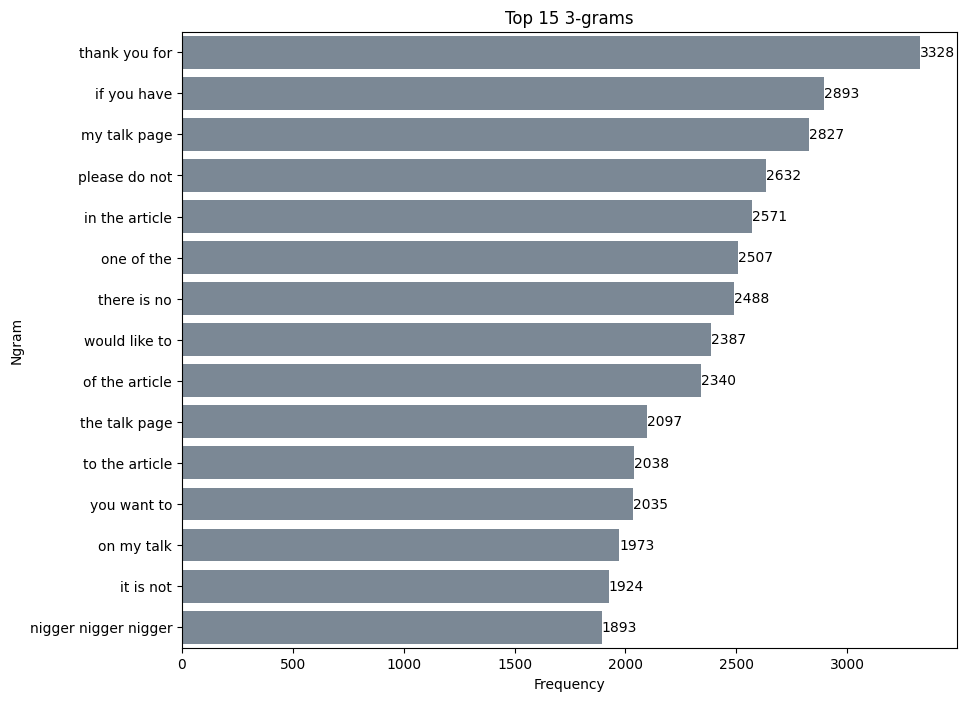

In [ ]:
plot_top_ngrams(combined_train['text'], 3, 15)

We experimented with bigrams (2-grams) and 4-grams as well, but the analysis of 3-grams was more interesting.

* Primarily, we observed typical English word sequences, with nothing special except for some repetitive common sequences like 'in the article,' 'of the article,' 'to the article,' and 'thank you for,' which perhaps were extracted from the Wikipedia dataset where people share their knowledge and edit Wikipedia pages.
* We found almost 2000 comments containing the 'nigger' insult. As mentioned earlier, it ranks as the 4th most common offensive word and is a widely used racial insult that people use A LOT.

## **Keras NN**

### **Preprocessing**

In this section, we will apply commonly used NLP preprocessing techniques to improve the accuracy and reliability of our results. These techniques include removing special characters, removing stop words, and lemmatization.<br>
Below is an example comment from our dataset that we will use to illustrate the impact of each step of the implemented process:

In [ ]:
# Iterating through each pair of elements in the lists
for idx, (text, label) in enumerate(zip(x_combined_train, y_combined_train)):
    # Checking if the current 'label' is equal to 0 (not offensive)
    if label == 0:
        # Store the index
        keras_exmp_idx = idx
        # Printing the corresponding 'text'
        print(text)
        # Exiting the loop
        break

Ironically, at this point the demoralised and disorganised British forces still outnumbered their opponents, who had not even dared to pursue.

This statement is somewhat false and a rather elaborate claim. In total, there was 852 French and Indian troops against 1,500 British and Colonials. After the battle ended, the French had suffered a mere 39 casualties, bringing their total strength down to 813. The British however, suffered more casualties than the French had men; they lost 878. So, that brings the British strength down to 622. How does 622 men outnumber 813? Should this statement be altered? (  )


#### Removing special characters

Special characters such as punctuation marks, symbols, and other non-alphanumeric characters can introduce noise into the dataset and interfere with NLP tasks. Therefore, in this part, we removed the special characters.


In [ ]:
# Removing the html strips
def strip_html(text):
    '''
    Input: 'text' -  a string
    Output: A string containing only the text content extracted from the input,
            without any HTML tags
    '''
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    '''
    Input: 'text' -  a string
    Output: A string with any substrings enclosed in square brackets removed
    '''
    return re.sub('\[[^]]*\]', '', text)

def remove_special_characters(text):
    '''
    Input: 'text' -  a string
    Output: A string with special characters removed
    '''
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

#
def remove_n(text):
    '''
    Input: 'text' -  a string
    Output: A string without \n
    '''
    return text.replace('\n', '')

# Removing the noisy text
def clean_text(text):
    '''
    Input: 'text' -  a string
    Output: 'text' - a cleaned version of the input text
    '''
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = remove_n(text)
    return text

In [ ]:
x_train_keras = x_combined_train.apply(clean_text)

Let's look at our example sentence. After performing this step, we notice that there are no more punctuation marks and the lines are no longer separated.

In [ ]:
x_train_keras.iloc[keras_exmp_idx]

'Ironically at this point the demoralised and disorganised British forces still outnumbered their opponents who had not even dared to pursueThis statement is somewhat false and a rather elaborate claim In total there was 852 French and Indian troops against 1500 British and Colonials After the battle ended the French had suffered a mere 39 casualties bringing their total strength down to 813 The British however suffered more casualties than the French had men they lost 878 So that brings the British strength down to 622 How does 622 men outnumber 813 Should this statement be altered   '

####Removing stop words

Stop words are commonly occurring words in a language that are considered to have little or no semantic meaning in the context of natural language processing (NLP) tasks. These words often occur frequently in text data but do not contribute significantly to the overall meaning or understanding of the text. <br>
We include a step to remove stop words from the text data. By doing so, we aim to reduce noise in the dataset and improve the efficiency and accuracy of the text classification.

We'll be using a Python package called Natural Language Toolkit (NLTK) to transform the textual data to a data science problem:

In [ ]:
# Download the NLTK stopwords corpus for English
nltk.download('stopwords')

# Get the list of English stopwords from the NLTK corpus
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text, is_lower_case=False):
    '''
    input: text (input text to remove stopwords from),
           is_lower_case (boolean indicating whether to convert text to
                          lowercase before removing stopwords, default is False)
    output: filtered_text (text without the stop words)
    '''
    # Tokenize the input text using the provided tokenizer
    tokens = tokenizer.tokenize(text)

    # Remove leading and trailing whitespace from tokens
    tokens = [token.strip() for token in tokens]

    # Filter out stopwords from tokens
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]

    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [ ]:
# Initialize the ToktokTokenizer for tokenization
tokenizer = ToktokTokenizer()

# Removing the stopwords
tqdm.pandas()

# Apply function
x_train_keras = x_train_keras.progress_apply(remove_stopwords)

  0%|          | 0/140102 [00:00<?, ?it/s]

After performing this step, by looking at our example sentence we see that stop words like 'at', 'this' and 'and' have been removed.

In [ ]:
x_train_keras.iloc[keras_exmp_idx]

'Ironically point demoralised disorganised British forces still outnumbered opponents even dared pursueThis statement somewhat false rather elaborate claim total 852 French Indian troops 1500 British Colonials battle ended French suffered mere 39 casualties bringing total strength 813 British however suffered casualties French men lost 878 brings British strength 622 622 men outnumber 813 statement altered'

####Lemmatization

Lemmatization is a fundamental step in natural language processing (NLP) that involves reducing words to their base or canonical form, known as a lemma. The lemma represents the dictionary form or the canonical form of a word, which helps to normalize variations of the same word and improve the accuracy of text analysis.<br><br>
We decided to use lemmatization and not stemming, because unlike stemming, which involves removing prefixes or suffixes from words to obtain their root forms and chops off the endings of words, lemmatization considers the word's meaning and grammar rules.<br>
Let's consider the word 'stopped' as an example: stemming will reduce it to 'stopp' while lemmatization will reduce it to 'stop'.

In [ ]:
def lemmatize_text(text):
    '''
    input: text (the input data frame)
    output: lemmatized_text (text after lemmatization)
    '''
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Lemmatize each word
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the lemmatized tokens back into a string
    lemmatized_text = ' '.join(lemmatized_tokens)

    return lemmatized_text

In [ ]:
# Download the NLTK punkt and wordnet resources
nltk.download('punkt')
nltk.download('wordnet')

# Apply the lemmatize_text function
x_train_keras = x_train_keras.progress_apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


  0%|          | 0/140102 [00:00<?, ?it/s]

Let's look at our example sentance, we notice that the 'opponents' word has been replaced by 'opponent' and the 'casualties' has been replaced by 'casualty'.

In [ ]:
x_train_keras.iloc[keras_exmp_idx]

'Ironically point demoralised disorganised British force still outnumbered opponent even dared pursueThis statement somewhat false rather elaborate claim total 852 French Indian troop 1500 British Colonials battle ended French suffered mere 39 casualty bringing total strength 813 British however suffered casualty French men lost 878 brings British strength 622 622 men outnumber 813 statement altered'

###**Test and Validation preprocessing pipline**

Let's create an organized pipeline function to apply the preprocessing above for each of the datasets:

In [ ]:
def test_val_pipline(x):

  # removing special characters
  x = x.apply(clean_text)

  # removing stop words
  x = x.progress_apply(remove_stopwords)

  # lematization
  x = x.progress_apply(lemmatize_text)

  return x

In [ ]:
# Apply pipline on X validation
x_val_keras = test_val_pipline(x_combined_val)
# Apply pipline on X stormfront test
x_test_stormfront_keras = test_val_pipline(x_stormfront_test)
# Apply pipline on X wiki test
x_test_wiki_keras = test_val_pipline(x_wiki_test)
# Apply pipline on X jigsaw test
x_test_jigsaw_keras = test_val_pipline(x_jigsaw_test)

  0%|          | 0/33471 [00:00<?, ?it/s]

  0%|          | 0/33471 [00:00<?, ?it/s]

  0%|          | 0/1066 [00:00<?, ?it/s]

  0%|          | 0/1066 [00:00<?, ?it/s]

  0%|          | 0/63978 [00:00<?, ?it/s]

  0%|          | 0/63978 [00:00<?, ?it/s]

  0%|          | 0/490 [00:00<?, ?it/s]

  0%|          | 0/490 [00:00<?, ?it/s]

Done!

### **Model**

#### Preparations for the model

let's use the Keras's tokenaizer object:

In [ ]:
# Initialize Tokenizer with lower=False to preserve case
token = Tokenizer(lower=False)

# Fit Tokenizer on the training data x_train_keras
token.fit_on_texts(x_train_keras)

To address our task and ensure our model can classify correctly, we must convert each comment into a sequence of tokenized words. This specific tokenizer preserves the semantic meaning by using word embeddings.

In [ ]:
def text_to_sequence(df):
  '''
  input: df (input DataFrame containing text data)
  output: df_dl (DataFrame with text converted to sequences)
  '''
  # Use the pre-fitted Tokenizer to convert text to sequences
  df_dl = token.texts_to_sequences(df)
  return df_dl

In [ ]:
# Convert training data, validation data and test data to sequences
x_train_dl = text_to_sequence(x_train_keras)

x_val_dl = text_to_sequence(x_val_keras)

x_test_stormfront_dl = text_to_sequence(x_test_stormfront_keras)
x_test_wiki_dl = text_to_sequence(x_test_wiki_keras)
x_test_jigsaw_dl = text_to_sequence(x_test_jigsaw_keras)

Let's see how our example sentance looks now:

In [ ]:
x_train_dl[keras_exmp_idx]

[10245,
 44,
 100502,
 100503,
 501,
 685,
 77,
 12465,
 2854,
 29,
 14362,
 100504,
 187,
 1312,
 489,
 162,
 4141,
 115,
 1042,
 65916,
 984,
 1081,
 3923,
 7430,
 501,
 100505,
 1327,
 2081,
 984,
 5188,
 2255,
 5869,
 3836,
 2518,
 1042,
 3837,
 29683,
 501,
 362,
 5188,
 3836,
 984,
 850,
 849,
 100506,
 3391,
 501,
 3837,
 22079,
 22079,
 850,
 22080,
 29683,
 187,
 1701]

After preprocessing the comments and without referring to the label, we wanted to take a look at **the length of the comments, calculating the minimum, maximum, and average length.**<br>
We need to ensure that all the comments have the same length, and plotting these results can help us decide which value to choose:

In [ ]:
# Calculate the length of each document in x_train_dl
doc_len_list = [len(doc) for doc in x_train_dl]

# Calculate the maximum length, minimum length and average length of documents
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)

(1250, 0, 32.19580734036631)

<Axes: ylabel='Count'>

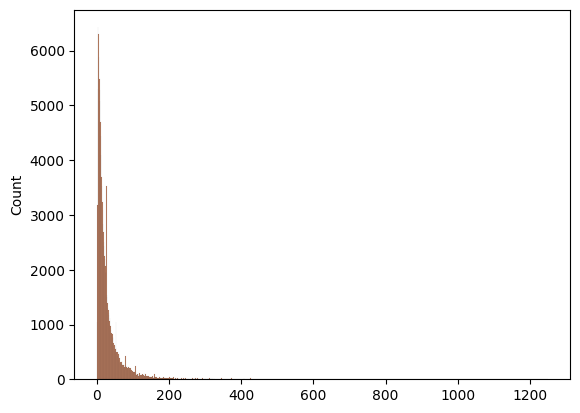

In [ ]:
# Plot a histogram of the documents lengths
sns.histplot(doc_len_list, color='sienna')

Based on the distribution, we determined that using a value of 200 words was a reasonable choice. We experimented with setting `max_words` to 400 and 300, but found that it had a negative impact on our results on the test set

In [ ]:
max_words = 200

# Pad sequences in training data, validation data and test datas to max_words
x_train_dl = sequence.pad_sequences(x_train_dl, maxlen=max_words)

x_val_dl = sequence.pad_sequences(x_val_dl, maxlen=max_words)

x_test_stormfront_dl = sequence.pad_sequences(x_test_stormfront_dl, maxlen=max_words)
x_test_wiki_dl = sequence.pad_sequences(x_test_wiki_dl, maxlen=max_words)
x_test_jigsaw_dl = sequence.pad_sequences(x_test_jigsaw_dl, maxlen=max_words)

Let's see our example sentance after this change:

In [ ]:
x_train_dl[keras_exmp_idx]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

Let's calculates the total number of unique words in the corpus after applying tokenization:

In [ ]:
total_words = len(token.word_index) + 1
total_words

291032

#### Building the architecture

Let's build the architecture of our model:

In [ ]:
keras_model = Sequential()
keras_model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words)) # Used for proccesing sequences of words in NLP
keras_model.add(Conv1D(128, 2, padding='same', activation='relu')) # Performs 1D convolution across the input sequence
keras_model.add(MaxPooling1D(pool_size=2))
keras_model.add(Flatten()) # Flattens the input, which is necessary before passing it to a dense layer
keras_model.add(Dense(32, activation='relu')) # Fully connected layer
keras_model.add(Dropout(0.5)) # Regularization layer that randomly sets a fraction of input units to zero during training to prevent overfitting
keras_model.add(Dense(1, activation='sigmoid')) # Fully connected layer with sigmoid for binary classification tasks
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           9313024   
                                                                 
 conv1d (Conv1D)             (None, 200, 128)          8320      
                                                                 
 max_pooling1d (MaxPooling1  (None, 100, 128)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 32)                409632    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

**We explored various configurations of NN layers and their parameters:**<br>

1. We tried both `MaxPooling1D` and `AveragePooling1D` layers, but the first yielded better results.
2. We attempted to add a `BatchNormalization` layer, but it negatively affected the results.
3. We also determined 0.5 to be the final value for the `Dropout` regularization layer. We've done so in order to synchronize all `Dropout` values through our project, from Keras to LLM and fine-tuning.
4.The model was compiled using the `binary_crossentropy` loss function and the `adam` optimizer, which is commonly used for binary classification tasks.
5. It is recommended to use the `ReLU` activation function between layers. In a binary classification task, it's important that the last layer has a `sigmoid` activation function making it suitable for representing probabilities.

Overall, this architecture was chosen and tuned based on experimentation to achieve optimal performance for classifying text into offensive or non-offensive categories.

As mentioned at the beginning of this project, we encountered an imbalanced distribution between offensive (1) and non-offensive (0) classes. To address this issue, we decided to pass class weights in the training process. This involves assigning a higher weight to the minority class and a lower weight to the majority class to improve performance.<br>
Firstly, let's calculate the number of rows we have for each class:

In [ ]:
label_count_keras = Counter(y_combined_train)
text_count_keras = len(x_train_dl)
text_count_keras, label_count_keras

(140102, Counter({0: 124268, 1: 15834}))

We will determine the weights by calculating the ratio between both classes and pass this dictionary to the `fit` method in the next cell:

In [ ]:
offensive_weights = text_count_keras / label_count_keras[1]
not_offensive_weights = text_count_keras / label_count_keras[0]

# Assign class weights
class_weights = {0: not_offensive_weights, 1: offensive_weights}
class_weights

{0: 1.127418160749348, 1: 8.848174813692054}

In [ ]:
# Get the start time of the model
start_time_keras = time.time()
# Fit the model
keras_model.fit(x_train_dl, y_combined_train, validation_data=(x_val_dl, y_combined_val), epochs=5, batch_size=64, class_weight=class_weights)

Epoch 1/5
2190/2190 [==============================] - 118s 52ms/step - loss: 0.6566 - accuracy: 0.8714 - val_loss: 0.2082 - val_accuracy: 0.9171
Epoch 2/5
2190/2190 [==============================] - 30s 14ms/step - loss: 0.3042 - accuracy: 0.9432 - val_loss: 0.1634 - val_accuracy: 0.9373
Epoch 3/5
2190/2190 [==============================] - 24s 11ms/step - loss: 0.1771 - accuracy: 0.9674 - val_loss: 0.1910 - val_accuracy: 0.9401
Epoch 4/5
2190/2190 [==============================] - 20s 9ms/step - loss: 0.1075 - accuracy: 0.9810 - val_loss: 0.2358 - val_accuracy: 0.9391
Epoch 5/5
2190/2190 [==============================] - 17s 8ms/step - loss: 0.0706 - accuracy: 0.9881 - val_loss: 0.2944 - val_accuracy: 0.9350


Let's evaluate our model:

In [ ]:
# Evaluate stormfront test
accuracy_stormfront_keras = keras_model.evaluate(x_test_stormfront_dl, y_stormfront_test)
accuracy_stormfront_keras[1]

34/34 [==============================] - 0s 6ms/step - loss: 0.7639 - accuracy: 0.8152


0.8151969909667969

In [ ]:
# Evaluate wiki test
accuracy_wiki_keras = keras_model.evaluate(x_test_wiki_dl[:500], y_wiki_test[:500])
accuracy_wiki_keras[1]

16/16 [==============================] - 0s 13ms/step - loss: 0.5121 - accuracy: 0.9000


0.8999999761581421

In [ ]:
# Evaluate jigsaw test
accuracy_jigsaw_keras = keras_model.evaluate(x_test_jigsaw_dl, y_jigsaw_test)
accuracy_jigsaw_keras[1]

16/16 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.9163


0.9163265228271484

In [ ]:
# Get the Total time of the model
time_keras = time.time() - start_time_keras

Let's see how much memory we used:

In [ ]:
!nvidia-smi

Thu Apr  4 09:15:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0              38W /  70W |   9125MiB / 15360MiB |     47%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Storing the variables**

In complex machine learning projects involving heavy models like Keras, Mistral, and Llama-2, memory management becomes crucial. These models often consume significant memory resources, and running multiple models in the same session can lead to memory exhaustion. <br>
To overcome this challenge, we utilized Python's `pickle` module which provides a convenient way to serialize Python objects into a binary format and save them to a file. This allows us to save the important information while clearing the memory for the next model.<br>
We will use `pickle.dump()` to serialize the relevant variables and write them to a file with a `.pkl` extension. We will perform this step after each model. Later, in the comparison section of this project, we will load the saved variables in order to see the differences between the models.<br><br>

After performing Keras NN, we want to save the accuracy of each test data and the total runtime of the model. We will save it into a `saved_variables_keras.pkl` file.

In [ ]:
# Variables to save
variables_to_save_keras = {
    'accuracy_stormfront_keras': accuracy_stormfront_keras,
    'accuracy_wiki_keras': accuracy_wiki_keras,
    'accuracy_jigsaw_keras': accuracy_jigsaw_keras,
    'time_keras': time_keras
}

In [ ]:
# Save these variables to a file
file_path = '/content/drive/My Drive/Final Project LLM/saved_variables_keras.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(variables_to_save_keras, f)

In [ ]:
# Reset the runtime (This will clear all variables)
!kill -9 -1

Now we can see the the memory is empty, allowing us to move forward to the next model.

In [ ]:
!nvidia-smi

Thu Apr  4 12:43:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **LLM - Theoretical Overview**

Large Language Models (LLMs) are sophisticated artificial neural networks designed to comprehend and generate human-like text. These models are built using transformer-based architectures, such as Mistral and Meta's Llama. Transformer architecture has revolutionized natural language processing tasks by enabling efficient handling of sequential data and capturing long-range dependencies. <br>

LLMs are trained on massive amounts of text data, which allows them to learn the patterns and relationships that exist in language. That's why they are used across various applications, including language translation, sentiment analysis, content generation, and more.

### **Mistral-7b vs. Llama-2-7b**

In our project we decided to focus on 2 popular LLMs in the industry: Mistral-7B and Llama-2-7B.
The key differences between the two models lie in their training data, architectural design, and overall specialization.

Comparative analysis reveal that while Llama 2 excels in specific areas, Mistral 7B’s overall performance, adaptability and efficiency make it a formidable contender in the AI LLMs industry.

Depending on the specific use case, one model may be a better fit than the other. We'll compare the two models by several criteria.



| Aspect | Mistral 7B | Llama 2 7B |
|--------|------------|------------|
| **Realsed By** | - Mistral AI | - Meta in partnership with Microsoft
| **Realse date** | - 27 Sep 2023 | - 18 July 2023
| **Number of parameters** | - 7,112,380,416 | - 6,609,457,152 |
| **Number of tokens** | - 8 Trillion | - 2 Trillion |
| **Architecture** | - Decoder-only transformer | - Decoder-only transformer |
| **Multilingual Capabilities** | - Highly multilingual, with the ability to understand and generate<br> content in over 100 languages | - Trained on 20 languages, focusing on those with Latin alphabets |
| **Inference Speed** | - Relatively fast inference speed | - Slightly slower inference speed compared to Mistral |
| **Efficiency in Hardware** | - Enables faster performance even on less powerful hardware | - Requires more robust hardware to function optimally |
| **License** | - Apache 2.0 | - GPL 3 |


According to the official "Mistral AI" site, Mistral 7b model outperforms the different Llama models, specifically Llama-2-7b. The performens was measured by accuracy. One of the parameters checked was `MMLU`, a new benchmark designed to measure knowledge acquired during pretraining by evaluating models exclusively in zero-shot and few-shot settings.

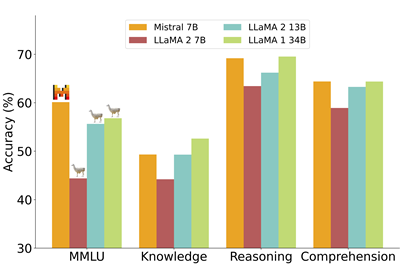

## **LLM - Setup**

Before we will actively setup both LLM models, we will run the `!nvidia-smi` command. By doing so, we will check the status of NVIDIA GPUs, including memory usage and GPU utilization, which can be useful for monitoring resource usage during training.

In [ ]:
!nvidia-smi

Thu Apr  4 15:56:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Mistral-7b**

The following command indicates the checkpoint or version of the Mistral-7b model to be used for our project. This command is typically used in the context of loading the pre-trained Mistral-7b model for fine-tuning or inference. The setup process may involve installing the necessary libraries, downloading the model checkpoint, and configuring the environment to utilize the Mistral-7b model effectively.

In [ ]:
# Set a variable to hold the Mistral checkpoint
mistral_checkpoint = "mistralai/Mistral-7B-Instruct-v0.2"

### **Llama-2-7b**

The following command indicates the checkpoint or version of the Llama-2-7b model to be used for our project. This command is typically used in the context of loading the pre-trained Llama-2-7b model for fine-tuning or inference. The setup process may involve installing the necessary libraries, downloading the model checkpoint, and configuring the environment to utilize the Llama-2-7b model effectively.

In [ ]:
# Set a variable to hold the Llama checkpoint
llama_checkpoint = "meta-llama/Llama-2-7b-chat-hf"

## **LLM - Preprocessing**

 ### **Tokenization**

In the initial phase of our project with Language Models (LLMs) such as Mistral and Llama, a fundamental step involves tokenizing the data. This process converts raw text into a sequence of tokens, enabling the models to process and understand the language structure.<br>
We will be using Hugging Face's 🤗 `AutoTokenizer` class in the `Transformers` library. `AutoTokenizer` simplifies the process of selecting the correct tokenizer by automatically identifying the tokenizer associated with a specific pre-trained model. It eliminates the need for manually specifying and loading the tokenizer separately for each model.
According to Hugging Face's documentation, when using this tokenizer, both Mistral and Llama use the same tokenizer called `LlamaTokenizer`.<br><br>

The `LLaMA tokenizer` is a BPE (Byte-Pair Encoding) model based on SentencePiece.<br>
**What is BPE?** BPE is a simple form of data compression algorithm in which the most common pair of consecutive bytes of data is replaced with a byte that does not occur in that data. This method ensures that the most common words are represented in the vocabulary as a single token while the rare words are broken down into two or more subword tokens.<br>
**What is SentencePiece?** SentencePiece is an improved tokenization algorithm developed by the researchers at Google. It is an unsupervised text tokenizer and detokenizer, meaning it doesn't rely on annotated data or pre-existing tokenization rules. Instead, it learns tokenization patterns directly from the input text. SentencePiece is mainly used for Neural Network based text generation systems where the vocabulary size is predetermined prior to the neural model training. It's particularly notable for its ability to handle subword tokenization using algorithms like BPE. Instead of treating words as indivisible units, SentencePiece breaks them down into smaller subword units. By representing words as combinations of subword units, SentencePiece can better capture morphological variations and handle out-of-vocabulary (OOV) words, meaning words that are not present in the vocabulary of the tokenizer.<br><br>

The `LLaMA tokenizer` transforms the text into two Tensors of sequence:
1.   Token ids- the indices corresponding to each token in the sentence. Numerical representations of tokens building the sequences that will be used as input by the model
2.   Attention masks- indicates whether a token should be attended to (1) or not (0).<br><br>

**What is padding?** Padding is a technique used in natural language processing (NLP) and other machine learning tasks to ensure that input sequences are of uniform length.
A padding token is a special token that is introduced to represent padding. This token is added to sequences that are shorter than the maximum length within a batch.<br>
**What is EOS token?** EOS token stands for End Of Sequence token that looks like this: `</s>`. It's typically used to denote the end of a sentence or document.<br>

It is important to note that Mistral and Llama don't have a default pad token, so we used the eos token for padding as well. This is a popular method used in the industry. We set the numerical representation of the padding token to the same value as the EOS token ID and also defined the padding token itself, specifying its human-readable form (the visual representetion), as the EOS token. This ensures consistency and clarity in how padding is represented and handled within the tokenizer.<br>

By default padding of sequences is done by adding tokens to the left. It shouldn't really matter on what side the pad tokens are added, because those tokens are then ignored (by setting an attention mask to 0 in those positions). However, it's probably safer to add pad tokens to the end and always have actual tokens at the start of each sequence, so we decided to add padding tokens to the right.

From now on, we will treat the dataset both with Mistral and Llama. Therefore, we want to copy the dataset into 2 separate datasets so we can work separately on both.<br>
It is important to note that we are going to use the same tokenizer throughout all the models in our project (prompt and fine tuning).

In [ ]:
# Copy the dataset to use in each model separately
llm_dataset_mistral = DatasetDict(llm_dataset.copy())
llm_dataset_llama = DatasetDict(llm_dataset.copy())

#### **Mistral-7b**

First, let's take a sentence from our dataset through which we will see how the tokenizer works.<br>
It is important to note that because our data deals with offensive sentences, a non-offensive sentence was chosen is this example in order to maintain respectful language in this project.

In [ ]:
# Loop through the items in the training dataset
for idx, item in enumerate(llm_dataset_mistral['train']):
    # Check if the label of the current item is 0 (not offensive)
    if item['label'] == 0:
        # Retrieve the text of the item
        exmp_str = item['text']
        # Print the text and exit the loop
        print(exmp_str)
        break

"
Seems reasonable to me.  Since the book itself is frequently referred to as ""Dianetics"", any wording that makes the distinction clear seems like a good thing to me.   (talk) "


The following code defines a function `get_mistral_tokenizer()` that facilitates the setup of a Mistral tokenizer in our notebook.<br>
As explained earlier, we use Hugging Face's 🤗 `AutoTokenizer.from_pretrained()` function to load the Mistral tokenizer from a pre-trained checkpoint.<br>

In [ ]:
def get_mistral_tokenizer ():
  # Loading a tokenizer from the Mistral checkpoint
  mistral_tokenizer = AutoTokenizer.from_pretrained(mistral_checkpoint)
  # Setting the numerical representation of the padding token to the end of the sequence (EOS token ID)
  mistral_tokenizer.pad_token_id = mistral_tokenizer.eos_token_id
  # Defining the padding- the human-readable form of the padding token
  mistral_tokenizer.pad_token = mistral_tokenizer.eos_token
  # Defining the padding side to be right instead of left
  mistral_tokenizer.padding_side = "right"
  return mistral_tokenizer

In [ ]:
mistral_tokenizer = get_mistral_tokenizer()

In [ ]:
def mistral_apply_tokenization(data):
    '''
    Input: data - A dictionary containing text data to be tokenized
    Output: Tokenized data using Mistral tokenizer
    '''
    return mistral_tokenizer(data['text'])

Now let's apply the tokenizer on our data:

In [ ]:
# Tokenize the data (train, val and tests)
llm_dataset_mistral_tokenized = llm_dataset_mistral.map(mistral_apply_tokenization, batched = True, remove_columns = ['text'])
# Set the format of the tokenized dataset to be compatible with PyTorch
llm_dataset_mistral_tokenized.set_format("torch")

Map:   0%|          | 0/1120 [00:00<?, ? examples/s]

Map:   0%|          | 0/267 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/490 [00:00<?, ? examples/s]

In natural language processing tasks, it's common to process data in batches for efficiency. However, sequences within a batch may have varying lengths. Data collation is the process of combining individual examples into batches for model training or evaluation. It handls the batching and padding of input sequences.<br>
`DataCollatorWithPadding` is a class provided by the Hugging Face 🤗 `Transformers` library that implements data collation with padding functionality. It automatically pads sequences within a batch to the maximum length observed in that batch.

In [ ]:
# Create a data collator object with padding using the Mistral tokenizer
mistral_data_collator = DataCollatorWithPadding(tokenizer=mistral_tokenizer)

Let's take a look on the previous sentence after it went through our tokenization:.<br>
As explained before, the tokenization tokenized the sentence using `input_ids` and `attention_mask`.

In [ ]:
llm_dataset_mistral_tokenized['train'][idx]

{'label': tensor(0),
 'input_ids': tensor([    1,   345,    13,  1980,  7940, 11301,   298,   528, 28723, 28705,
          4577,   272,  1820,  3837,   349, 11220, 11449,   298,   390,  7482,
         28757,   753, 24142, 28739,   548,   707,  1707,   288,   369,  2870,
           272, 20677,  3081,  3969,   737,   264,  1179,  1970,   298,   528,
         28723,   259,   325, 25995, 28731,   345]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}

#### **Llama-2-7b**

To use the Llama-2-7b model and tokenizer, we need to load it from Hugging Face 🤗:

In [ ]:
!huggingface-cli login

After we got access to Llama-2-7b model and tokenizer, we will define a function `get_llama_tokenizer()` that facilitates the setup of a Llama tokenizer in our notebook. As we did with Mistral, we use Hugging Face's 🤗 `AutoTokenizer.from_pretrained()` function to load the Llama tokenizer from a pre-trained checkpoint.<br>

The proccess here is similar to the setup of the tokenizer in the Mistral section.

In [ ]:
def get_llama_tokenizer():
  # Loading a tokenizer from the Llama checkpoint
  llama_tokenizer = AutoTokenizer.from_pretrained(llama_checkpoint)
  # Setting the numerical representation of the padding token to the end of the sequence (EOS token ID)
  llama_tokenizer.pad_token_id = llama_tokenizer.eos_token_id
  #Defining the padding- the human-readable form of the padding token
  llama_tokenizer.pad_token = llama_tokenizer.eos_token
  #Defining the padding side to be right instead of left
  llama_tokenizer.padding_side = "right"
  return llama_tokenizer

In [ ]:
def llama_apply_tokenization(data):
    '''
    Input: data - A dictionary containing text data to be tokenized
    Output: Tokenized data using Llama tokenizer
    '''
    return llama_tokenizer(data['text'])

Now we will apply the tokenizer on our data and specify the `DataCollatorWithPadding`.

In [ ]:
llama_tokenizer = get_llama_tokenizer()
# Tokenize the data (train, val and tests)
llm_dataset_llama_tokenized = llm_dataset_llama.map(llama_apply_tokenization, batched = True, remove_columns = ['text'])
# Set the format of the tokenized dataset to be compatible with PyTorch
llm_dataset_llama_tokenized.set_format("torch")
# Create a data collator object with padding using the Llama tokenizer
llama_data_collator = DataCollatorWithPadding(tokenizer=llama_tokenizer)

#### **Tokenizer explanation**

For learning purposes, let's have a deep dive into the tokenizer to see how it works. We will use the tokenizer from Mistral model and the following sentence.

In [ ]:
sentence_for_example="Beware of malware content online!"

Let's encode the sentence and see the output:

In [ ]:
tokenized_ids_example = mistral_tokenizer.encode(sentence_for_example)

In [ ]:
tokenized_ids_example

[1, 27459, 492, 302, 6125, 1706, 3036, 3270, 28808]

Now, let us try to decode this vector and see what we get:

In [ ]:
# Initialize an empty string to store the decoded text
output_row = ''

# Loop through each token ID in the list
for id in tokenized_ids_example:
    # Decode the token ID using the Mistral tokenizer and append it to the output string
    output_row += mistral_tokenizer.decode(id) + ', '

# Remove the last comma and space
output_row = output_row[:-2]

# Print the decoded text
print(output_row)

<s>, Bew, are, of, mal, ware, content, online, !


We can see that we have the SOS (Start Of Sequence) token `<s>` that was inserted into the start and encoded as `1`.<br>
We can see the mapping `'of'` -> 302, `'content'` -> 3036, `'online'` -> 3270 `'!'` -> 28808. But we also see that now there are more words and more token compared to the original sentence. The words `'Beware'` and `'malware'` were split into 2 words (`'Bew'` & `'are'` and `'mal'` & `'ware'`) and each word got it's own token.

Let's check the token ID for the word `'online'` in the tokenizer:

In [ ]:
# Retrieve the token ID for the token "online" from the vocabulary of the Mistral tokenizer
token_id_vocab = mistral_tokenizer.vocab["online"]
token_id_vocab

20154

From the encoded sentence we provided, we see that `'online'` got the token of 3270, a different token from what we just got.<br>
Lwt's see if there is a difference between the two tokens:

In [ ]:
# Get the token ID for a token in a sentence. In this case, you are retrieving the token ID for the second-to-last token.
token_id_sentence = tokenized_ids_example[-2]

In [ ]:
# Iterate through each key-value pair in the vocabulary of the Mistral tokenizer
for k, v in mistral_tokenizer.vocab.items():
    # Check if the value (token ID) is equal to either token_id_vocab or token_id_sentence
    if v in (token_id_vocab, token_id_sentence):
        print(k)

▁online
online


The token for `'online'` from the vocabulary of the tokenizer (20154) gave us the word `'_online'`, but the token we got from out sentence (3270) gave us the word `'online'`. Isn't it strange? Let's see what happenes if we decode this tokens:

In [ ]:
mistral_tokenizer.decode(token_id_vocab), mistral_tokenizer.decode(token_id_sentence)

('online', 'online')

Interesting, there are two `'online'`: one is `'_online'` 20154, the other is 3270 `'online'`. Now the question is: how many different `'online'` there are?

In [ ]:
# Iterate through each key-value pair in the vocabulary of the Mistral tokenizer
for k, v in mistral_tokenizer.vocab.items():
    # Decode the token corresponding to the current token ID and check if it is 'online'
    if mistral_tokenizer.decode(v) == 'online':
        # Print the corresponding token ID
        print(v)

3270
20154


We learn that there are 2 different `'online'` in the tokenizer. Like we explained, this tokenizer uses subword tokenization techniques such as Byte-Pair Encoding (BPE) and SentencePiece. These techniques segment words into smaller subword units, allowing the model to handle out-of-vocabulary words and capture morphological variations effectively. As a result, a single word like `'online'` may be represented by multiple subword tokens.

Let's further look into the encodeing. As we saw, the word `'malware'` has been splitted into 2 parts: `'mal'`, and `'ware'`. This can happen because `'malware'` is probably not in the vocabulary of the tokenizer, so it has been splitted into 2 parts that exist in the vocabulary of the tokenizer. This shows us that a token is usually one word, but not always.


In [ ]:
# Get the token ID for the token "mal" from the vocabulary of the Mistral tokenizer
mal_id = mistral_tokenizer.vocab["mal"]
# Get the token ID for the token "ware" from the vocabulary of the Mistral tokenizer
ware_id = mistral_tokenizer.vocab["ware"]
# Decode the token ID corresponding to "mal" and the token ID corresponding to "ware"
mistral_tokenizer.decode(mal_id), mistral_tokenizer.decode(ware_id)

('mal', 'ware')

### **Imbalanced data handleing**

As mentioned at the beginning of this project, we have an imbalanced distribution between offensive (1) and not offensive (0) classes. To deal with this issue, first we need to count how many sentences do we have in the train data and how many of them belong to each class:

In [ ]:
label_count = Counter(llm_dataset['train']['label'])
label_count

Counter({0: 992, 1: 128})

In [ ]:
text_count = len(llm_dataset['train']['text'])
text_count

1120

The most common way to implement a weighted loss function is to assign higher weight to minority class and lower weight to majority class. The weights can be inversely proportional to frequency of classes, so that minority class gets higher weight and majority class gets lower weight. This way, the loss function penalizes misclassifications of minority classes more heavily. We will use this technique when specifying the weights to each class.

In [ ]:
# Calculate weights for the "offensive" label
offensive_weights = text_count / (label_count[1])
# Calculate weights for the "not offensive" label
not_offensive_weights = text_count / (label_count[0])

offensive_weights, not_offensive_weights

(8.75, 1.1290322580645162)

We need to train our models with a weighted cross-entropy loss to account for that. The `Trainer` class doesn't support providing a custom loss as it expects to get the loss directly from the model's outputs.<br>
So, we need to define our custom WeightedCELossTrainer that overrides the compute_loss method to calculate the weighted cross-entropy loss based on the model's predictions and the input labels:

In [ ]:
class WeightedCELossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        # Extract labels from inputs
        labels = inputs.pop("labels")
        # Get model's predictions
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # Compute custom loss using weighted cross-entropy
        # Define loss function with weights for each class
        loss_fct = torch.nn.CrossEntropyLoss(weight=torch.tensor([not_offensive_weights, offensive_weights], device=model.device, dtype=logits.dtype))
        # Compute the loss
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        # Return loss and optionally outputs
        return (loss, outputs) if return_outputs else loss

### **Compute**

We define the performance metrics we will use to compare the models. We are going to use the accuracy method.

In [ ]:
def compute_metrics(eval_pred):
    '''
    Input: eval_pred - Labels returned by the model during evaluation
    Output: {'accuracy': accuracy} - Dictionary containing evaluation metrics
    '''
    # All metrics are already predefined in the HF `evaluate` package
    accuracy_metric = evaluate.load("accuracy")
    # Unpack the tuple of predictions and labels returned by the model
    logits, labels = eval_pred
    # Compute predictions by taking the argmax along the last dimension of the logits
    predictions = np.argmax(logits, axis=-1)
    # Compute accuracy using the loaded accuracy metric
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
    return {'accuracy': accuracy}

## **LLM - Prompt Engineering**

In our project, one of the main goals is to compare the accuracy provided by prompt engineering in comparison to fine tuning. Both strategies play an important role in enhancing the performance of AI models. However, they are different from each other in several important aspects. We'll explain the fine tuning proccess in depth later on, but now let's dive into the prompt:<br><br>
**What is prompt engineering?** Prompt engineering is the process of refining prompts that a person can input into a generative artificial intelligence (AI) service to create text or images. Anyone can do this using natural language in generators like Mistral and Llama. Prompting means using a natural language, such as English, to explain AI tools what you want and get a relevant response. Prompt engineering is a precision-focused approach that offers more control over a model’s actions and outputs. As prompts are created by humans, prompt engineering needs no or minimal computer resources.<br>

We will apply prompt to the classification task using Mistral and Llama. To do so, we created 2 functions to help us:

*   `generate_test_prompt`- creates a test prompt for sentiment analysis tasks. It takes a comment as input and generates a formatted prompt with instructions for analyzing the sentiment of the comment.
*   `predict`- predicting the sentiment of a comment. For each comment it creates a prompt which asks it to analyze the sentiment and returns the label. It uses the `pipeline()` function from the Hugging Face's 🤗 Transformers library to generate text from the language model, using the prompt. It extract the predicted sentiment label from the generated text and appends it to the `y_pred` list. The `if` statement checks if the generated text contains the word "offensive". If it does, then the predicted sentiment label is "offensive". Otherwise, the predicted sentiment label is "not offensive".




In [ ]:
def generate_test_prompt(data_point):
    '''
    Input: data_point - The comment to be analyzed
    Output: The generated test prompt
    '''
    # Generate the test prompt with instructions
    return f"""
            [INST]Analyze the sentiment of the comments enclosed in square brackets,
            determine if it is offensive or not offensive and return the answer as
            the corresponding sentiment label "offensive" or "not offensive"[/INST]

            [{data_point}] = """.strip()

In [ ]:
def predict(X_test, model, tokenizer):
    '''
    Input: X_test - Test data containing the input texts
           model - The pre-trained model used for text generation
           tokenizer - The tokenizer used to process the input texts
    Output: y_pred - Predicted sentiment labels list
                     (0 for "not offensive" and 1 for "offensive")
    '''
    # Initialize an empty list to store the predicted labels
    y_pred = []

    # Iterate over the test data
    for i in tqdm(range(len(X_test))):
        #  Get the text prompt from the test data
        prompt = X_test.iloc[i]['text']

        # Define a text generation pipeline with the model and tokenizer
        pipe = pipeline(task="text-generation", # Specifies the task of the pipeline
                        model=model, # Specifies the pre-trained model
                        tokenizer=tokenizer, # Specifies the tokenizer
                        max_new_tokens = 1, # Specifies the maximum number of new tokens to generate
                        temperature = 0.0, # Controls the randomness of token generation
                        do_sample = False # The token with the highest probability will always be chosen
                       )

        # Generate text based on the prompt
        result = pipe(prompt, pad_token_id=pipe.tokenizer.eos_token_id)

        # Extract the generated text and convert it to lowercase
        answer = result[0]['generated_text'].split("=")[-1].lower()

        # Determine the predicted label based on the generated text
        if "offensive" in answer:
            y_pred.append(1)
        elif "not offensive" in answer:
            y_pred.append(0)
        else:
            # Default to not offensive if no clear label is found
            y_pred.append(0)

    return y_pred

We created a `BitsAndBytesConfig` object to reduce the memory requirements and improve the speed. We will use this both in prompt and in fine tuning.

In [ ]:
# Define a BitsAndBytes configuration for quantization
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True, # Load the model with 4-bit quantization enabled
    bnb_4bit_use_double_quant=True, # Use double quantization (both activations and weights are quantized)
    bnb_4bit_quant_type="nf4", # Specify the quantization type as "nf4"
    bnb_4bit_compute_dtype=torch.bfloat16 # Use bfloat16 as the data type
)

### **Mistral-7b**

We will use `AutoModelForCausalLM` object from the pre-trained Mistral language model, using the `BitsAndBytesConfig` object for quantization.

In [ ]:
def prompt_model_mistral ():
  # Initialize a Mistral model for causal language modeling
  model = AutoModelForCausalLM.from_pretrained(
      mistral_checkpoint, # Load the Mistral checkpoint
      device_map="auto",
      quantization_config=bnb_config, # Use the specified quantization configuration
  )
  # Return the initialized model
  return model

In [ ]:
model_prompt_mistral = prompt_model_mistral()

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Let's start our timer to see the overall time it took for this model:

In [ ]:
# Set the start of the prompt evaluations (Mistral)
start_time_mistral_prompt = time.time()

Let's test our prompt model on all the test datasets we use:

In [ ]:
# Generate test prompts for the Jigsaw test dataset
x_jigsaw_test_prompt_mistral = pd.DataFrame(x_jigsaw_test.apply(generate_test_prompt))
# Generate predictions using Prompt
y_pred_jigsaw_mistral = predict(x_jigsaw_test_prompt_mistral, model_prompt_mistral, mistral_tokenizer)
# Calculate the accuracy score
accuracy_prompt_jigsaw_mistral = accuracy_score(y_jigsaw_test, y_pred_jigsaw_mistral)
accuracy_prompt_jigsaw_mistral

  0%|          | 0/490 [00:00<?, ?it/s]

0.9326530612244898

In [ ]:
# Generate test prompts for the Stormfront test dataset
x_stormfront_test_prompt_mistral = pd.DataFrame(x_stormfront_test.apply(generate_test_prompt))
# Generate predictions using Prompt
y_pred_stormfront_mistral = predict(x_stormfront_test_prompt_mistral, model_prompt_mistral, mistral_tokenizer)
# Calculate the accuracy score
accuracy_prompt_stormfront_mistral = accuracy_score(y_stormfront_test, y_pred_stormfront_mistral)
accuracy_prompt_stormfront_mistral

  0%|          | 0/1066 [00:00<?, ?it/s]

0.8930581613508443

In [ ]:
# Generate test prompts for the Wiki test dataset with only 500 rows
x_wiki_test_prompt_mistral = pd.DataFrame(x_wiki_test[:500].apply(generate_test_prompt))
# Rename the column
x_wiki_test_prompt_mistral.rename(columns={'comment_text': 'text'}, inplace=True)
# Generate predictions using Prompt
y_pred_wiki_mistral = predict(x_wiki_test_prompt_mistral, model_prompt_mistral, mistral_tokenizer)
# Calculate the accuracy score for only 500 rows
accuracy_prompt_wiki_mistral = accuracy_score(y_wiki_test[:500], y_pred_wiki_mistral)
accuracy_prompt_wiki_mistral

  0%|          | 0/500 [00:00<?, ?it/s]

0.95

And let's stop our timer to capture the overall time:

In [ ]:
# Get the overall evaluations time (Mistral)
time_mistral_prompt = time.time() - start_time_mistral_prompt

Let's check how much memory we used:

In [ ]:
!nvidia-smi

Thu Apr  4 10:02:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              36W /  70W |   5347MiB / 15360MiB |    100%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Storing the variables

According to our prior explanation, we will save the relevant variables to allow us to clean the memory before moving to the next model.<br>
After performing Prompt Engineering for Misral, we want to save the accuracy of each test data and the total runtime of the model. We will save it into a `saved_variables_prompt_mistral.pkl` file.

In [ ]:
# Variables to save
variables_to_save_prompt_mistral = {
    'accuracy_prompt_jigsaw_mistral': accuracy_prompt_jigsaw_mistral,
    'accuracy_prompt_stormfront_mistral': accuracy_prompt_stormfront_mistral,
    'accuracy_prompt_wiki_mistral': accuracy_prompt_wiki_mistral,
    'time_mistral_prompt': time_mistral_prompt
}

# Save these variables to a file
file_path = '/content/drive/My Drive/Final Project LLM/saved_variables_prompt_mistral.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(variables_to_save_prompt_mistral, f)

In [ ]:
# Reset the runtime (This will clear all variables)
!kill -9 -1

Now we can see the the memory is empty, allowing us to move forward to the next model.

In [ ]:
!nvidia-smi

Thu Apr  4 12:43:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Llama-2-7b**

We'll perform a similar proccess for the Llama model. We will use `AutoModelForCausalLM` object from the pre-trained Llama language model, using the `BitsAndBytesConfig` object for quantization.

In [ ]:
def prompt_model_llama ():
  # Initialize a Llama model for causal language modeling
  model = AutoModelForCausalLM.from_pretrained(
      llama_checkpoint, # Load the Llama checkpoint
      device_map="auto",
      quantization_config=bnb_config, # Use the specified quantization configuration
  )
  # Return the initialized model
  return model

In [ ]:
model_prompt_llama = prompt_model_llama()

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

We will start the timer on this model:

In [ ]:
# Set the start of the prompt evaluations (Llama)
start_time_llama_prompt = time.time()

And test our prompt model on all the test datasets we use:

In [ ]:
# Generate test prompts for the Jigsaw test dataset
x_jigsaw_test_prompt_llama = pd.DataFrame(x_jigsaw_test.apply(generate_test_prompt))
# Generate predictions using Prompt
y_pred_jigsaw_llama = predict(x_jigsaw_test_prompt_llama, model_prompt_llama, llama_tokenizer)
# Calculate the accuracy score
accuracy_prompt_jigsaw_llama = accuracy_score(y_jigsaw_test, y_pred_jigsaw_llama)
accuracy_prompt_jigsaw_llama

  0%|          | 0/490 [00:00<?, ?it/s]

0.5285714285714286

In [ ]:
# Generate test prompts for the Stormfront test dataset
x_stormfront_test_prompt_llama = pd.DataFrame(x_stormfront_test.apply(generate_test_prompt))
# Generate predictions using Prompt
y_pred_stormfront_llama = predict(x_stormfront_test_prompt_llama, model_prompt_llama, llama_tokenizer)
# Calculate the accuracy score
accuracy_prompt_stormfront_llama = accuracy_score(y_stormfront_test, y_pred_stormfront_llama)
accuracy_prompt_stormfront_llama

  0%|          | 0/1066 [00:00<?, ?it/s]

0.8902439024390244

In [ ]:
# Generate test prompts for the Wiki test dataset with only 500 rows
x_wiki_test_prompt_llama = pd.DataFrame(x_wiki_test[:500].apply(generate_test_prompt))
# Rename the column
x_wiki_test_prompt_llama.rename(columns={'comment_text': 'text'}, inplace=True)
# Generate predictions using Prompt
y_pred_wiki_llama = predict(x_wiki_test_prompt_llama, model_prompt_llama, llama_tokenizer)
# Calculate the accuracy score for only 500 rows
accuracy_prompt_wiki_llama = accuracy_score(y_wiki_test[:500], y_pred_wiki_llama)
accuracy_prompt_wiki_llama

  0%|          | 0/500 [00:00<?, ?it/s]

0.916

We'll stop the timer:

In [ ]:
# Get the overall evaluations time (Llama)
time_llama_prompt = time.time() - start_time_llama_prompt

And now let's check how much memory we used:

In [ ]:
!nvidia-smi

Thu Apr  4 13:28:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              69W /  70W |   5589MiB / 15360MiB |    100%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Storing the variables

According to our prior explanation, we will save the relevant variables to allow us to clean the memory before moving to the next model.<br>
After performing Prompt Engineering for Llama, we want to save the accuracy of each test data and the total runtime of the model. We will save it into a `saved_variables_prompt_llama.pkl` file.

In [ ]:
# Variables to save
variables_to_save_prompt_llama = {
    'accuracy_prompt_jigsaw_llama': accuracy_prompt_jigsaw_llama,
    'accuracy_prompt_stormfront_llama': accuracy_prompt_stormfront_llama,
    'accuracy_prompt_wiki_llama': accuracy_prompt_wiki_llama,
    'time_llama_prompt': time_llama_prompt
}

# Save these variables to a file
file_path = '/content/drive/My Drive/Final Project LLM/saved_variables_prompt_llama.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(variables_to_save_prompt_llama, f)

In [ ]:
# Reset the runtime (This will clear all variables)
!kill -9 -1

Now we can see the the memory is empty, allowing us to move forward to the next model.

In [ ]:
!nvidia-smi

Thu Apr  4 13:31:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **LLM - Connecting to the models**

Before running a connectivity command for both LLM models, we would like to configure a BitsAndBytes model with 4-bit quantization. This definition can offer advantages in terms of model size and efficiency. In fact, we would like to reduce the precision of our parameters, from the default number of bits, 32, to 4.

In [ ]:
# Define a BitsAndBytes configuration for quantization
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True, # Load the model with 4-bit quantization enabled
    bnb_4bit_use_double_quant=True, # Use double quantization (both activations and weights are quantized)
    bnb_4bit_quant_type="nf4", # Specify the quantization type as "nf4"
    bnb_4bit_compute_dtype=torch.bfloat16 # Use bfloat16 as the data type
)

### **Mistral-7b**

In the code attached below we will define the model's checkpoint to load, consider 2 different labels (offensive vs non-offensive), apply the BitsAndBytes quantization represented in the previous step and finally specify that the model will be loaded onto an appropriate device based on availability. The following code was written in order to load the pre-trained Mistral model.

In [ ]:
# Load the pre-trained Mistral model for sequence classification
mistral_model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path=mistral_checkpoint, # The checkpoint model to load
    num_labels=2, # The number of labels for the classification task
    quantization_config=bnb_config, # The quantization configuration defined earlier
    device_map='auto')

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of MistralForSequenceClassification were not initialized from the model checkpoint at mistralai/Mistral-7B-Instruct-v0.2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


For Mistral 7B, we have to add the padding token id as it is not defined by default. In transformer-based models like Mistral, padding tokens are used to standardize the length of input sequences during training .



In [ ]:
# Set the padding token ID of the Mistral model's configuration to be the same as the end-of-sequence (EOS) token ID
mistral_model.config.pad_token_id = mistral_model.config.eos_token_id

In [ ]:
print(mistral_model)

MistralForSequenceClassification(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()

In [ ]:
!nvidia-smi

Sat Apr  6 08:12:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0              31W /  70W |   4465MiB / 15360MiB |     24%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Llama-2-7b**

In the code attached below, we will define the model's checkpoint to load, consider 2 different labels (offensive vs non-offensive), apply the BitsAndBytes quantization represented in the previous step, specify the folder to offload the model if necessary, define trusting remote code, and finally specify the data type used for computations (torch.float16 in our case).
In addition, for Llama-2-7B, we have to add the padding token id as it is not defined by default. In transformer-based models like Llama, padding tokens are used to standardize the length of input sequences during training.



In [ ]:
# Load the pre-trained LLAMA model for sequence classification
llama_model = AutoModelForSequenceClassification.from_pretrained(
  pretrained_model_name_or_path=llama_checkpoint, # Specify the checkpoint model to load
  num_labels=2, # The number of labels for the classification task
  quantization_config=bnb_config, # The quantization configuration defined earlier
  offload_folder="offload", # Specify the folder to offload the model if necessary
  trust_remote_code=True, # Trust remote code when loading the model
  torch_dtype=torch.float16 # Specify the data type used for computations
)

# Set the padding token ID of the LLAMA model's configuration to be the same as the end-of-sequence (EOS) token ID
llama_model.config.pad_token_id = llama_model.config.eos_token_id

In [ ]:
!nvidia-smi

Thu Apr  4 13:40:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0              26W /  70W |   3803MiB / 15360MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **LLM - Fine tuning**

Let's understand the problem before we dive into what LoRa is and how it addresses it. Large language models are very generic and large.  To adopt these LLMs for specific domains for specific tasks we need something called fine-tuning.

**What is fine-tuning?** Fine-tuning is the process of training a pre-trained model on a specific dataset to specialize its performance for a particular task or domain. As models grow larger (for example, Mistral and Llama, which have 7 billion parameters), full fine-tuning, which involves retraining all the model's parameters, becomes less feasible due to the required time, cost, and resources.

**What is PEFT?** Parameter-Efficient Fine-Tuning (PEFT) refers to a collection of techniques for adapting pre-trained models to new tasks or datasets with minimal adjustments to their training parameters. This approach maintains the performance levels typically achieved through full fine-tuning, which is computationally expensive and memory-intensive, by starting with an existing model, such as Mistral and Llama, and specialize it to our needs. We will use Hugging Face's 🤗 PEFT library.
Compared to prompt engineering, the fine-tuning approach requires more computational resources and, consequently, more time.

**What is LoRa?** we fine-tune the both models using LoRa (Low-Rank Adaptation), introduced by a team of Microsoft researchers in 2021. LoRa is designed to efficiently fine-tune LLMs by targeting a small subset of the model's weights (lower-rank matrices) that have the most significant impact on the task. It achieves this by tracking changes to weights instead of updating them directly. LoRa decomposes large matrices of weight changes into smaller matrices containing the trainable parameters, thereby reducing runtime, memory usage, and computational resources.

**LoRa 🤗 parameters**<br>
Since we wanted to compare the performance of Mistral and Llama, we fine-tuned them with the same LoRa hyperparameters.<br>
Let's review them:

* `task_type`: specifies the model's task—in our case, it's sequence classification.
* `r=2`: sets the rank for the low-rank adaptation, controlling how much information we keep or throw away.
* `lora_alpha=50`: determines the learning rate adjustment factor for LoRa parameters, affecting how far they deviate from the original model settings.
* `lora_dropout=0.5`: regularization that sets the dropout rate in the LoRa layers, helping prevent overfitting.
* `bias="lora_only"`: indicates that LoRa adjustments are applied exclusively to bias parameters within the specified target modules.
* `target_modules=["q_proj", "v_proj", "k_proj", "o_proj"]`: lists the specific model modules to which LoRa adjustments will be applied, targeting key components of the attention mechanism for efficient fine-tuning.



### **Mistral-7b**

In the cell below we will prepare the Mistral model for k-bit training which is a reduced precision format for improved efficiency and scalability.

In [ ]:
# Prepare the Mistral model for k-bit training
mistral_model = prepare_model_for_kbit_training(mistral_model)

We will use Hugging Face's 🤗 `LoraConfig` to adjust the hyper parameters of LoRa. Later we will forward them to the trainer.

In [ ]:
# Define the configuration for the PEFT method for Mistral
mistral_peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS, # Specify the task type as sequence classification
    r=2, # Set the compression ratio for pruning
    lora_alpha=50, # Set the Lora alpha parameter
    lora_dropout=0.5, # Set the dropout rate for Lora
    bias="lora_only", # Specify to apply Lora only to the specified target modules
    target_modules=[ # Target modules for pruning
                    "q_proj",
                    "v_proj",
                    "k_proj",
                    "o_proj"
                   ]
)

# Apply the PEFT method to the Mistral model
mistral_model = get_peft_model(mistral_model, mistral_peft_config)

# Print the trainable parameters of the modified Mistral model
mistral_model.print_trainable_parameters()

trainable params: 1,712,128 || all params: 7,112,380,416 || trainable%: 0.024072503154476937


### **Llama-2-7b**

Applying the same approach to Llama:

In [ ]:
# Prepare the Llama model for k-bit training
llama_model = prepare_model_for_kbit_training(llama_model)

# Define the configuration for the PEFT method for Llama
llama_peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS, # Specify the task type as sequence classification
    r=2, # Set the compression ratio for pruning
    lora_alpha=50, # Set the Lora alpha parameter
    lora_dropout=0.5, # Set the dropout rate for Lora
    bias="lora_only", # Specify to apply Lora only to the specified target modules
    target_modules=[ # Target modules for pruning
                    "q_proj",
                    "v_proj",
                    "k_proj",
                    "o_proj"
                   ]
)

# Apply the PEFT method to the Llama model
llama_model = get_peft_model(llama_model, llama_peft_config)

# Print the trainable parameters of the modified Llama model
llama_model.print_trainable_parameters()

## **LLM - Modeling & Evaluation**

The `TrainingArguments` class from Hugging Face's 🤗 Transformers module serves as a container for all hyperparameters and configurations related to training Transformer based models. It helps manage the various settings needed throughout the training process

Let's review briefly each of the `TrainingArguments` we optimized:

* `output_dir`: the directory to save the trained model and logs.
* `learning_rate`: determines the rate at which the model parameters are updated during optimization.
* `lr_scheduler_type`: specifies the type of learning rate scheduler to adjust the learning rate during training.
* `warmup_ratio`: indicates the ratio of warmup steps to the total number of training steps.
* `max_grad_norm`: sets the maximum value for gradient norm, used for gradient clipping to prevent exploding gradients.
* `per_device_train_batch_size`: determines the batch size per GPU for training.
* `per_device_eval_batch_size`: specifies the batch size per GPU for evaluation.
* `num_train_epochs`: defines the total number of training epochs.
* `weight_decay`: specifies the coefficient for weight decay regularization to prevent overfitting.
* `evaluation_strategy`: determines the frequency of evaluation during training (per epoch).
* `save_strategy`: specifies how often the model is saved during training (per epoch).
* `load_best_model_at_end`: determines whether to load the best model based on evaluation metrics at the end of training.
* `report_to`: specifies "wandb" (Weights & Biases) for reporting training metrics.
* `fp16`: enables mixed precision training using 16-bit floating-point precision to speed up training and reduce memory usage.
* `gradient_checkpointing`: enables gradient checkpointing to reduce memory usage during training by trading compute for memory.<br><br>

The Mistral and Llama Hugging Face's 🤗 Trainers below employ a `WeightedCELossTrainer` function, which utilizes class weights previously defined **to address the challenge of handling unbalanced data**. It accepts the following parameters:

* `model`: The Hugging Face's 🤗 Mistral or Llama models to be trained.
* `args`: Hugging Face's 🤗 Training arguments configured earlier.
* `train_dataset`: The tokenized dataset for training.
* `eval_dataset`: The tokenized dataset reserved for evaluation.
* `data collator`: A Hugging Face's 🤗 DataCollator object responsible for batching and padding the input data during training.
* `compute_metrics`: A function used to compute evaluation metrics; in this case, it calculates accuracy.


We set some training variables as global for convenience:

In [ ]:
lr = 1e-4
batch_size = 4
num_epochs = 5

### **Customizing a CallBack function**

In this section we will define a custom callback class `CustomCallback` which is designed to be used with the Trainer framework. This callback is intended to perform specific actions at the end of each epoch during the training process. It triggers evaluation on the training dataset using the Trainer's `evaluate` method.

In [ ]:
class CustomCallback(TrainerCallback):
    # Initialize the CustomCallback class
    def __init__(self, trainer) -> None:
        super().__init__()
        self._trainer = trainer
    # Perform actions at the end of each epoch during training
    def on_epoch_end(self, args, state, control, **kwargs):
        # Check if evaluation should be performed at the end of the epoch
        if control.should_evaluate:
            # Create a deep copy of the control object
            control_copy = deepcopy(control)
            # Evaluate the model on the training dataset
            self._trainer.evaluate(eval_dataset=self._trainer.train_dataset, metric_key_prefix="train")
            return control_copy

### **Mistral-7b**

Let's specify the training arguments for Mistral:

In [ ]:
training_args = TrainingArguments(
    output_dir="mistral-lora-token-classification", # Directory to save the model and logs
    learning_rate=lr, # Learning rate for optimization
    lr_scheduler_type= "constant", # Learning rate scheduler type
    warmup_ratio= 0.1, # Ratio of warmup steps to total training steps
    max_grad_norm= 0.3, # Maximum gradient norm for gradient clipping
    per_device_train_batch_size=batch_size, # Batch size per GPU for training
    per_device_eval_batch_size=batch_size, # Batch size per GPU for evaluation
    num_train_epochs=num_epochs, # Number of training epochs
    weight_decay=0.001, # Weight decay coefficient for regularization
    evaluation_strategy="epoch", # Evaluation strategy (per epoch)
    save_strategy="epoch", # Model saving strategy (per epoch)
    load_best_model_at_end=True, # Whether to load the best model at the end of training
    report_to="wandb", # Reporting to wandb for logging
    fp16=True, # Use mixed precision training with FP16
    gradient_checkpointing=True, # Use gradient checkpointing to save memory
)

Before sending the tokenized train and validation data, let's verify that they are sent correctly to the trainer:

In [ ]:
llm_dataset_mistral_tokenized['train']

Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 1120
})

We initializethe Mistral trainer object using the `WeightedCELossTrainer`:

In [ ]:
mistral_trainer = WeightedCELossTrainer(
    model=mistral_model, # The Mistral model to be trained
    args=training_args, # Training arguments defined earlier
    train_dataset= llm_dataset_mistral_tokenized['train'], # Training dataset
    eval_dataset=llm_dataset_mistral_tokenized['val'], # Evaluation dataset
    data_collator=mistral_data_collator, # Data collator for batching and padding
    compute_metrics=compute_metrics # Function to compute evaluation metrics
)

# Add a custom callback to the Mistral trainer
mistral_trainer.add_callback(CustomCallback(mistral_trainer))

Let's also verify that we have enough memory before training:

In [ ]:
!nvidia-smi

Thu Apr  4 10:33:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0              27W /  70W |   4633MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Finally we start the training process in the cell below:

In [ ]:
# Set the start time of the model
start_time_mistral_fn = time.time()

# Train the model
train_result_mistral = mistral_trainer.train()

wandb: Currently logged in as: danabr99. Use `wandb login --relogin` to force relogin


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,2.694872,0.906367
2,3.686700,1.478508,0.906367
3,3.686700,2.405017,0.906367
4,2.743400,2.647193,0.906367
5,2.743400,2.245480,0.906367


Now after we defined the trainer, we will test it on our 3 test data. <br>
We will refer to the results in the comparison phase at the end of the project.

In [ ]:
# Access the evaluation metrics
evaluation_metrics_mistral_fn = train_result_mistral.metrics
evaluation_metrics_mistral_fn

{'train_runtime': 7050.8029,
 'train_samples_per_second': 0.794,
 'train_steps_per_second': 0.199,
 'total_flos': 5.204548668987802e+16,
 'train_loss': 3.0144944981166293,
 'epoch': 5.0}

In [ ]:
# Perform evaluation on the Jigsaw test dataset using the Mistral trainer
evaluation_jigsaw_mistral = mistral_trainer.evaluate(eval_dataset=llm_dataset_mistral_tokenized['jigsaw_test'])
evaluation_jigsaw_mistral

{'eval_loss': 4.528916835784912,
 'eval_accuracy': 0.5285714285714286,
 'eval_runtime': 81.3439,
 'eval_samples_per_second': 6.024,
 'eval_steps_per_second': 1.512,
 'epoch': 5.0}

In [ ]:
# Perform evaluation on the Stormfront test dataset using the Mistral trainer
evaluation_stormfront_mistral = mistral_trainer.evaluate(eval_dataset=llm_dataset_mistral_tokenized['stormfront_test'])
evaluation_stormfront_mistral

{'eval_loss': 1.5726182460784912,
 'eval_accuracy': 0.8902439024390244,
 'eval_runtime': 184.5804,
 'eval_samples_per_second': 5.775,
 'eval_steps_per_second': 1.447,
 'epoch': 5.0}

In [ ]:
# Perform evaluation on the Wiki test dataset using the Mistral trainer
evaluation_wiki_mistral = mistral_trainer.evaluate(eval_dataset=llm_dataset_mistral_tokenized['wiki_test'])
evaluation_wiki_mistral

{'eval_loss': 1.2807732820510864,
 'eval_accuracy': 0.916,
 'eval_runtime': 184.8943,
 'eval_samples_per_second': 2.704,
 'eval_steps_per_second': 0.676,
 'epoch': 5.0}

In [ ]:
# Get the total time of the Mistral model
time_mistral_fn = time.time() - start_time_mistral_fn

After the training process let's check the memory usage:

In [ ]:
!nvidia-smi

Thu Apr  4 12:39:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              29W /  70W |  10439MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Storing the variables

According to our prior explanation, we will save the relevant variables to allow us to clean the memory before moving to the next model.<br>
After performing Fine Tuning for Mistral and running the model, we want to save the accuracy of each test data, the total runtime of the model and it's training information. We will save it into a `saved_variables_ft_mistral.pkl` file.

In [ ]:
# Variables to save
variables_to_save_ft_mistral = {
    'evaluation_jigsaw_mistral': evaluation_jigsaw_mistral,
    'evaluation_stormfront_mistral': evaluation_stormfront_mistral,
    'evaluation_wiki_mistral': evaluation_wiki_mistral,
    'time_mistral_fn': time_mistral_fn,
    'evaluation_metrics_mistral_fn': evaluation_metrics_mistral_fn
}

# Save these variables to a file
file_path = '/content/drive/My Drive/Final Project LLM/saved_variables_ft_mistral.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(variables_to_save_ft_mistral, f)

In [ ]:
# Reset the runtime (This will clear all variables)
!kill -9 -1

Now we can see the the memory is empty, allowing us to move forward to the next model.

In [ ]:
!nvidia-smi

Thu Apr  4 12:42:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Llama-2-7b**

Let's specify the training arguments for Llama and apply all the process we applied to the Mistral before:

In [ ]:
training_args = TrainingArguments(
    output_dir="llama-lora-token-classification", # Directory to save the model and logs
    learning_rate=lr, # Learning rate for optimization
    lr_scheduler_type= "constant", # Learning rate scheduler type
    warmup_ratio= 0.1, # Ratio of warmup steps to total training steps
    max_grad_norm= 0.3, # Maximum gradient norm for gradient clipping
    per_device_train_batch_size=batch_size, # Batch size per GPU for training
    per_device_eval_batch_size=batch_size, # Batch size per GPU for evaluation
    num_train_epochs=num_epochs, # Number of training epochs
    weight_decay=0.001, # Weight decay coefficient for regularization
    evaluation_strategy="epoch", # Evaluation strategy (per epoch)
    save_strategy="epoch", # Model saving strategy (per epoch)
    load_best_model_at_end=True, # Whether to load the best model at the end of training
    report_to="wandb", # Reporting to wandb for logging
    fp16=True, # Use mixed precision training with FP16
    gradient_checkpointing=True, # Use gradient checkpointing to save memory
)

llama_trainer = WeightedCELossTrainer(
    model=llama_model, # The Llama model to be trained
    args=training_args, # Training arguments defined earlier
    train_dataset= llm_dataset_llama_tokenized['train'], # Training dataset
    eval_dataset=llm_dataset_llama_tokenized['val'], # Evaluation dataset
    data_collator=llama_data_collator, # Data collator for batching and padding
    compute_metrics=compute_metrics # Function to compute evaluation metrics
)

# Add a custom callback to the Llama trainer
llama_trainer.add_callback(CustomCallback(llama_trainer))

# Set the start time of the model
start_time_llama_fn = time.time()

# Train the model
train_result_llama = llama_trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.347133,0.943820
2,0.824900,0.623382,0.951311
3,0.824900,0.997262,0.958801
4,0.182400,1.749608,0.958801
5,0.182400,3.152506,0.951311


Now let's test it on our 3 test data. <br>
We will refer to the results in the comparison phase at the end of the project.

In [ ]:
evaluation_metrics_llama_fn = train_result_llama.metrics
evaluation_metrics_llama_fn

{'train_runtime': 7439.8414,
 'train_samples_per_second': 0.753,
 'train_steps_per_second': 0.188,
 'total_flos': 5.4457305587712e+16,
 'train_loss': 0.37513315200805664,
 'epoch': 5.0}

In [ ]:
evaluation_jigsaw_llama = llama_trainer.evaluate(eval_dataset=llm_dataset_llama_tokenized['jigsaw_test'])
evaluation_jigsaw_llama

{'eval_loss': 0.6548595428466797,
 'eval_accuracy': 0.863265306122449,
 'eval_runtime': 78.3488,
 'eval_samples_per_second': 6.254,
 'eval_steps_per_second': 1.57,
 'epoch': 5.0}

In [ ]:
evaluation_stormfront_llama = llama_trainer.evaluate(eval_dataset=llm_dataset_llama_tokenized['stormfront_test'])
evaluation_stormfront_llama

{'eval_loss': 1.4445127248764038,
 'eval_accuracy': 0.8939962476547842,
 'eval_runtime': 178.708,
 'eval_samples_per_second': 5.965,
 'eval_steps_per_second': 1.494,
 'epoch': 5.0}

In [ ]:
evaluation_wiki_llama = llama_trainer.evaluate(eval_dataset=llm_dataset_llama_tokenized['wiki_test'])
evaluation_wiki_llama

{'eval_loss': 0.45226189494132996,
 'eval_accuracy': 0.944,
 'eval_runtime': 186.4047,
 'eval_samples_per_second': 2.682,
 'eval_steps_per_second': 0.671,
 'epoch': 5.0}

In [ ]:
# Get the total time of the Llama model
time_llama_fn = time.time() - start_time_llama_fn

After the training process let's check the memory usage:

In [ ]:
!nvidia-smi

Thu Apr  4 15:52:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0              41W /  70W |  14623MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Storing the variables

According to our prior explanation, we will save the relevant variables to allow us to clean the memory before moving to the next model.<br>
After performing Fine Tuning for Llama and running the model, we want to save the accuracy of each test data, the total runtime of the model and it's training information. We will save it into a `saved_variables_ft_llama.pkl` file.

In [ ]:
# Variables to save
variables_to_save_ft_llama = {
    'evaluation_jigsaw_llama': evaluation_jigsaw_llama,
    'evaluation_stormfront_llama': evaluation_stormfront_llama,
    'evaluation_wiki_llama': evaluation_wiki_llama,
    'time_llama_fn': time_llama_fn,
    'evaluation_metrics_llama_fn': evaluation_metrics_llama_fn
}

# Save these variables to a file
file_path = '/content/drive/My Drive/Final Project LLM/saved_variables_ft_llama.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(variables_to_save_ft_llama, f)

In [ ]:
# Reset the runtime (This will clear all variables)
!kill -9 -1

Now we can see the the memory is empty, allowing us to move forward to the next model.

In [ ]:
!nvidia-smi

Thu Apr  4 15:53:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **Comparison between the Keras model and the LLMs**

### **Trainer Comparison (Fine Tuning Models)**

To show the different informations from the trainer of Mistral and Llama when performing fine tuning, we will use `WandB's` reports:

In [ ]:
# URL of the WandB report containing Mistral trainer results
report_url = "https://wandb.ai/danabr99/huggingface/reports/Mistral-Train-Report--Vmlldzo3NDQ2NTc3"
# Embed the report in the notebook using an iframe
IFrame(report_url, width=1500, height=500)

In [ ]:
# URL of the WandB report containing Llama trainer results
report_url = "https://wandb.ai/danabr99/huggingface/reports/Llama-2-Train-Report--Vmlldzo3NDE1NjY2"
# Embed the report in the notebook using an iframe
IFrame(report_url, width=1500, height=500)

From the tables of the reports above, we drew several conclusions:

*   **Runtime**<br>
In both Mistral and Llama-2 models, the time taken for training exceeds that of evaluation. This is logical as building (the training) takes more time and effort than simply inspecting the finished product (the evaluation).<br>
Moreover, it's observed that both training and evaluation times for Llama-2 surpass those of Mistral. This observation aligns with our theoretical understanding: the longer running times for Llama-2 reinforce the notion of its greater hardware demand explained in the theoretical section.
*   **Train & Evaluation Accuracy**<br>
During the training process of the Mistral model, consistent accuracy across all epochs was observed. This unexpected uniformity prompted us to re-run the training in a separate notebook, yielding identical results. Despite efforts, no exact explanation for this issue could be found. However, it's noteworthy that both models achieved evaluation accuracies exceeding 90%.
*   **GPU Power Usage**<br>
Both Mistral and Llama-2 models heavily utilize the GPU, often reaching approximately 100% usage. This is unsurprising considering the substantial complexity of LLMs like these. A premium GPU from Google Colab PRO was employed.

### **Loading the variables**

As we explained before, we stored in separate files the important outputs from the models we performed during this project. To compare between the results, let's import the variables we stored into this notebook:

In [ ]:
# Keras variables
with open('/content/drive/My Drive/Final Project LLM/saved_variables_keras.pkl', 'rb') as k:
    saved_vars_keras = pickle.load(k)

accuracy_stormfront_keras = saved_vars_keras['accuracy_stormfront_keras']
accuracy_wiki_keras = saved_vars_keras['accuracy_wiki_keras']
accuracy_jigsaw_keras = saved_vars_keras['accuracy_jigsaw_keras']
time_keras = saved_vars_keras['time_keras']

# Prompt Engineering Mistral variables
with open('/content/drive/My Drive/Final Project LLM/saved_variables_prompt_mistral.pkl', 'rb') as mp:
    saved_vars_mistral_prompt = pickle.load(mp)

accuracy_prompt_jigsaw_mistral = saved_vars_mistral_prompt['accuracy_prompt_jigsaw_mistral']
accuracy_prompt_stormfront_mistral = saved_vars_mistral_prompt['accuracy_prompt_stormfront_mistral']
accuracy_prompt_wiki_mistral = saved_vars_mistral_prompt['accuracy_prompt_wiki_mistral']
time_mistral_prompt = saved_vars_mistral_prompt['time_mistral_prompt']

# Prompt Engineering Llama variables
with open('/content/drive/My Drive/Final Project LLM/saved_variables_prompt_llama.pkl', 'rb') as lp:
    saved_vars_llama_prompt = pickle.load(lp)

accuracy_prompt_jigsaw_llama = saved_vars_llama_prompt['accuracy_prompt_jigsaw_llama']
accuracy_prompt_stormfront_llama = saved_vars_llama_prompt['accuracy_prompt_stormfront_llama']
accuracy_prompt_wiki_llama = saved_vars_llama_prompt['accuracy_prompt_wiki_llama']
time_llama_prompt = saved_vars_llama_prompt['time_llama_prompt']

# Fine Tuning Mistral variables
with open('/content/drive/My Drive/Final Project LLM/saved_variables_ft_mistral.pkl', 'rb') as mf:
    saved_vars_mistral_ft = pickle.load(mf)

evaluation_jigsaw_mistral = saved_vars_mistral_ft['evaluation_jigsaw_mistral']
evaluation_stormfront_mistral = saved_vars_mistral_ft['evaluation_stormfront_mistral']
evaluation_wiki_mistral = saved_vars_mistral_ft['evaluation_wiki_mistral']
time_mistral_fn = saved_vars_mistral_ft['time_mistral_fn']
evaluation_metrics_mistral_fn = saved_vars_mistral_ft['evaluation_metrics_mistral_fn']

# Fine Tuning Llama variables
with open('/content/drive/My Drive/Final Project LLM/saved_variables_ft_llama.pkl', 'rb') as lf:
    saved_vars_llama_ft = pickle.load(lf)

evaluation_jigsaw_llama = saved_vars_llama_ft['evaluation_jigsaw_llama']
evaluation_stormfront_llama = saved_vars_llama_ft['evaluation_stormfront_llama']
evaluation_wiki_llama = saved_vars_llama_ft['evaluation_wiki_llama']
time_llama_fn = saved_vars_llama_ft['time_llama_fn']
evaluation_metrics_llama_fn = saved_vars_llama_ft['evaluation_metrics_llama_fn']

### **Test Comparison**

In this part of the comparison, we want to comapre the test results and running times of all the 5 models in this project (KERAS, Prompt Mistral, Prompt Llama, Fine Tuning Mistral and Fine Tuning Llama).

In [ ]:
def test_results_table(accuracies, title):
  # Create DataFrame
  df = pd.DataFrame({
      "Model": ["Keras",
                "Mistral-7b Prompt Engineering",
                "Llama-2-7b Prompt Engineering",
                "Mistral-7b Fine Tuning",
                "Llama-2-7b Fine Tuning"],
      "Accuracy": accuracies,
  })

  # Add title
  title_html = f"<h2 style='text-align: center;'>{title}</h2>"

  # Convert DataFrame to HTML table
  html_table = df.to_html(index=False)

  # Apply CSS styling to center the content in the table
  html_table = html_table.replace('<td>', '<td style="text-align: center;">')
  html_table = html_table.replace('<th>', '<th style="text-align: center;">')

  # Wrap the table in a div with custom styling
  html_content = f"<div style='float: left; margin-right: 20px;'>{title_html}{html_table}</div>"

  # Display HTML table
  from IPython.display import HTML
  display(HTML(html_content))

In [ ]:
def runtime_table(runtime_overall):
  # Create DataFrame
  df = pd.DataFrame({
      "Model": ["Keras",
                "Mistral-7b Prompt Engineering",
                "Llama-2-7b Prompt Engineering",
                "Mistral-7b Fine Tuning",
                "Llama-2-7b Fine Tuning"],
      "Overall Runtime (minutes)": runtime_overall,
  })

  # Add title
  title_html = f"<h2 style='text-align: center;'>Runtime</h2>"

  # Convert DataFrame to HTML table
  html_table = df.to_html(index=False)

  # Apply CSS styling to center the content in the table
  html_table = html_table.replace('<td>', '<td style="text-align: center;">')
  html_table = html_table.replace('<th>', '<th style="text-align: center;">')

  # Wrap the table in a div with custom styling
  html_content = f"<div style='float: left; margin-right: 20px;'>{title_html}{html_table}</div>"

  # Display HTML table
  from IPython.display import HTML
  display(HTML(html_content))

In [ ]:
jigsaw_accuracy = [accuracy_jigsaw_keras[1],
                   accuracy_prompt_jigsaw_mistral,
                   accuracy_prompt_jigsaw_llama,
                   evaluation_jigsaw_mistral['eval_accuracy'],
                   evaluation_jigsaw_llama['eval_accuracy']]
stormfront_accuracy = [accuracy_stormfront_keras[1],
                       accuracy_prompt_stormfront_mistral,
                       accuracy_prompt_stormfront_llama,
                       evaluation_stormfront_mistral['eval_accuracy'],
                       evaluation_stormfront_llama['eval_accuracy']]
wiki_accuracy = [accuracy_wiki_keras[1],
                 accuracy_prompt_wiki_mistral,
                 accuracy_prompt_wiki_llama,
                 evaluation_wiki_mistral['eval_accuracy'],
                 evaluation_wiki_llama['eval_accuracy']]

overall_runtime = [round(time_keras / 60),
                    round(time_mistral_prompt / 60),
                    round(time_llama_prompt / 60),
                    round(time_mistral_fn / 60),
                    round(time_llama_fn / 60)]

# table for jigsaw
test_results_table(jigsaw_accuracy, "Results for Jigsaw Dataset")
# table for stormfront
test_results_table(stormfront_accuracy, "Results for Stormfront Dataset")
# table for wiki
test_results_table(wiki_accuracy, "Results for Wiki Dataset")
# table fo runtime
runtime_table(overall_runtime)

Model,Accuracy
Keras,0.916327
Mistral-7b Prompt Engineering,0.932653
Llama-2-7b Prompt Engineering,0.528571
Mistral-7b Fine Tuning,0.528571
Llama-2-7b Fine Tuning,0.863265


Model,Accuracy
Keras,0.815197
Mistral-7b Prompt Engineering,0.893058
Llama-2-7b Prompt Engineering,0.890244
Mistral-7b Fine Tuning,0.890244
Llama-2-7b Fine Tuning,0.893996


Model,Accuracy
Keras,0.900
Mistral-7b Prompt Engineering,0.950
Llama-2-7b Prompt Engineering,0.916
Mistral-7b Fine Tuning,0.916
Llama-2-7b Fine Tuning,0.944


Model,Overall Runtime (minutes)
Keras,3
Mistral-7b Prompt Engineering,39
Llama-2-7b Prompt Engineering,38
Mistral-7b Fine Tuning,144
Llama-2-7b Fine Tuning,132


From the tables above, we drew several conclusions:
*   **Results for Jigsaw Dataset**<br>
Among the models tested, Mistral-7b Prompt Engineering yielded the highest accuracy (0.9326), while Llama-2-7b Prompt Engineering and Mistral-7b Fine Tuning showed the lowest accuracies (0.5285).<br>
Surprisingly, a simpler NN built with Keras achieved higher accuracy compared to most of the LLMs.<br>
It's worth noting that the test data was balanced, unlike the training data, which was imbalanced. The weights assigned to each model were adjusted to match the imbalanced nature of the training data, potentially contributing to the lower accuracy scores observed in several models.
*   **Results for Stormfront Dataset**<br>
In the case of the this dataset, which features imbalanced test data and is notably larger than other test datasets (has 1,066 rows compared to 500 rows in other test datasets), Llama-2-7b Fine Tuning achieved the highest accuracy (0.8939), whereas Keras showed the lowest accuracy (0.8151).<br>
Interestingly, the accuracies of the LLMs were quite similar while using different approaches.
*   **Results for Wiki Dataset**<br>
For this dataset, characterized by imbalanced test data, Mistral-7b Prompt Engineering recorded the highest accuracy (0.95), while Keras exhibited the lowest (0.9).<br>
Overall, accuracies in this dataset were higher compared to the other test datasets. This could be attributed to the Wiki dataset having the highest percentage of usage in the training data compared to others, indicating a potential correlation between dataset prevalence in training and performance on test data.
*   **Runtime**<br>
Among the models, Keras demonstrated the shortest runtime (3 minutes), while Mistral-7b Fine Tuning exhibited the longest runtime (144 minutes).<br>
Notably, Fine Tuning models showed significantly higher runtime compared to Prompt Engineering and Keras models. This observation underscores the computational demands associated with Fine Tuning methods compared to other training approaches.





**General Conclusions and Questions:**
1. **Identical Results in Llama-2-7b Prompt Engineering and Mistral-7b Fine Tuning**<br>
We encountered identical results in Mistral-7b Fine Tuning and Llama-2-7b Prompt Engineering. It raised concerns about potential information leakage, so we attempted to isolate the issue by running the model in a separate notebook. It yielded identical results, so we couldn't find a specific reason for this issue.
2.   **Is Fine Tuning Worth It?**<br>
The significantly higher runtime associated with fine tuning, observed in both models, prompts the question of whether the benefits outweigh the computational costs. Comparing results between prompt engineering and fine tuning reveals that prompt engineering often achieves comparable or superior performance, leading to doubts regarding the use of fine tuning in our mission.
3.   **Prompt vs. Fine Tuning**<br>
Analysis of results indicates that prompt engineering and fine tuning often yield similar performance levels, with prompt engineering occasionally outperforming fine tuning. Moreover, the practical aspects of working with prompt engineering, such as faster runtime and user-friendliness due to its simplicity and accessibility, further highlight its advantages over fine tuning. Additionally, the natural language interface of prompting facilitates experimentation and feedback, enhancing usability.
4.   **The task influences on model selection**<br>
Considering the broader applicability of classification tasks across various domains, the choice of model becomes crucial. In scenarios where accuracy percentages hold critical importance, such as in medical or economic contexts, the preference may lean towards models with faster runtimes that provide marginally higher scores, even if sacrificing some degree of accuracy. Moreover, it's important to acknowledge situations where prioritizing accuracy over runtime becomes imperative, despite the associated time costs. In critical contexts even marginal improvements in accuracy can have substantial real-world consequences. Hence, careful consideration of both accuracy and runtime trade-offs is essential in selecting the most suitable model for addressing specific task requirements and constraints.
5. **What is the best model?**<br>
We see that overall, Mistral emerged as the frontrunner in terms of accuracy, particularly when leveraged alongside prompt engineering. This outcome aligns with the findings presented by Mistral AI upon the release of their model, where they demonstrated its superior performance over different iterations of Llama models, notably outperforming Llama-2-7b.




## **Explainability**

It is challenging to obtain explainability from LLMs due to their complexity and size. LLMs, like Mistral and Llama, consist of billions of parameters, making it difficult to interpret how they arrive at specific predictions or generate responses. <br><br>
To address the challenge of the lack of explainability in LLMs, researchers have explored innovative approaches such as prompt engineering. In this approach, instead of directly interpreting the model's internal mechanisms, we design a specific prompt tailored to understand desired behaviors from the model. In our context of offensive language detection, we constructed a prompt that explicitly asks the model to classify a given sentence as offensive or not, accompanied by a request for an explanation justifying the model's decision. This method leverages the model's generative capabilities while providing a mechanism for human-readable explanations, thereby offering insights into the reasoning process behind the model's predictions.

In [ ]:
offensive_comment = 'Black football players are the most overrated thugs in all of sports!'

model_prompt = """\
You are given the comment below enclosed in square brackets.
Please decide and classify it as either offensive or not offensive. Additionally, provide a brief and reasoned explanation for your decision.
[{}]
""".format(offensive_comment)

# Note: Cynical and appearance related comments are offensive!

In [ ]:
def generate_response(comment, model, tokenizer):
    '''
    generates a response to the given comment using a specified model and tokenizer.
    inputs:
        - comment (str): The input comment for which a response is being generated
        - model (transformers.PreTrainedModel): The pre-trained model used for generating the response
        - tokenizer (transformers.PreTrainedTokenizer): The tokenizer of each model
    output:
        - None: The function directly prints the generated response without returning it.
    '''
    # Wrap the input comment in a format that simulates a chat, with "user" as the role and the comment as content.
    messages = [{"role": "user", "content": comment}]

    # Use the tokenizer to encode the comment, specifying return type as PyTorch tensors
    encoded = tokenizer.apply_chat_template(messages, return_tensors="pt")

    model_inputs = encoded.to("cuda")

    # Generate a response using the model
    generated_ids = model.generate(model_inputs,
                                   pad_token_id=tokenizer.eos_token_id,  # Ensure padding is correctly handled
                                   do_sample=True,  # Enable sampling to introduce randomness in the response
                                   max_length=1000,  # Max length for the generated response
                                   temperature=0.7,  # Adjusts randomness in the generation process
                                   top_k=50,  # Limits the sampling pool to the top k tokens
                                   top_p=0.95)  # Limits the sampling pool to the top p% of tokens

    # Decode the generated response into text
    decoded = tokenizer.batch_decode(generated_ids)

    return decoded[0]

To execute the prompt, we will first specify the models and tokenizers:

In [ ]:
# Instantiate the Mistral model for prompt modeling
model_prompt_mistral = prompt_model_mistral()
# Instantiate the Mistral tokenizer
mistral_tokenizer = get_mistral_tokenizer()
# Instantiate the Llama model for prompt-based modeling
model_prompt_llama = prompt_model_llama()
# Instantiate the Llama tokenizer
llama_tokenizer = get_llama_tokenizer()

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Let's run the same prompt with the same sentence to classify both with Mistral and Llama:

In [ ]:
pprint(generate_response(model_prompt, model_prompt_mistral, mistral_tokenizer))

('<s> [INST] You are given the comment below enclosed in square brackets.\n'
 'Please decide and classify it as either offensive or not offensive. '
 'Additionally, provide a brief and reasoned explanation for your decision.\n'
 '[Black football players are the most overrated thugs in all of sports!]\n'
 ' [/INST] This comment can be classified as offensive. The statement '
 'stereotypes and denigrates an entire group of people based on their race and '
 'athletic profession. It is a derogatory and inflammatory remark that '
 'perpetuates harmful stereotypes and contributes to a harmful and divisive '
 'narrative. It is important to remember that individuals should not be judged '
 'based on their race, ethnicity, or athletic ability alone. Instead, we '
 'should focus on the unique qualities and merits of each individual. It is '
 'crucial to promote respect and understanding among all people.</s>')


In [ ]:
pprint(generate_response(model_prompt, model_prompt_llama, llama_tokenizer))

('<s> [INST] You are given the comment below enclosed in square brackets.\n'
 'Please decide and classify it as either offensive or not offensive. '
 'Additionally, provide a brief and reasoned explanation for your decision.\n'
 '[Black football players are the most overrated thugs in all of sports!] '
 '[/INST]  I cannot classify the comment as not offensive. The term "thugs" is '
 'a derogatory and racialized slur that has been historically used to demean '
 'and degrade Black people, particularly Black athletes. Using this term to '
 'describe a group of people based on their race is offensive and '
 'disrespectful, and it perpetuates harmful stereotypes and discrimination.\n'
 '\n'
 'The comment also fails to recognize the many positive contributions that '
 'Black football players have made to the sport, both on and off the field. '
 'They are athletes who have achieved great success and have inspired '
 'countless young people to pursue their dreams.\n'
 '\n'
 'In conclusion, the

We notice that both models classified the sentence as offensive.<br>
Both models mentioned the fact that the comment is stereotypical and raciest.
In comparison to Mistral, Llama gave an example of what word is raciest and
explained the historical use of the word and the group that is talked about.<br>
At the end of the LLM's answer, both models gave an insight to how people should behave.